In [2]:
import os
import glob
import matplotlib.pyplot as plt
import random
import cv2
from ultralytics import YOLO

f:\Harshit\Harshit_Testing\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0],  bboxes[1]
    xmax, ymax = bboxes[0] + bboxes[2], bboxes[1] + bboxes[3]
    return xmin, ymin, xmax, ymax

In [3]:
# function to plot the bounding boxes to their respective images
def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
    
        x1, y1, x2, y2 = yolo2bbox(box)
        thickness = 1
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        cv2.rectangle(
            image,
            (x1, y1), (x2, y2),
            (0, 0, 255),
            thickness
        )
    return image


In [4]:
# Function to plot images with the bounding boxes.

def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    # print(all_images)
    
    # all_images.sort()

    num_images = len(all_images)
    # print(num_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        bboxes = []
        labels = []
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            label_lines = f.readlines()
            for label_line in label_lines:
                label_list = label_line.split(",")
                label_list = [label.strip() for label in label_list]
                image_size = label_list[:4]
                label = label_list[4:]
                
                x_c, y_c, w, h = image_size
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes , labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')

    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()



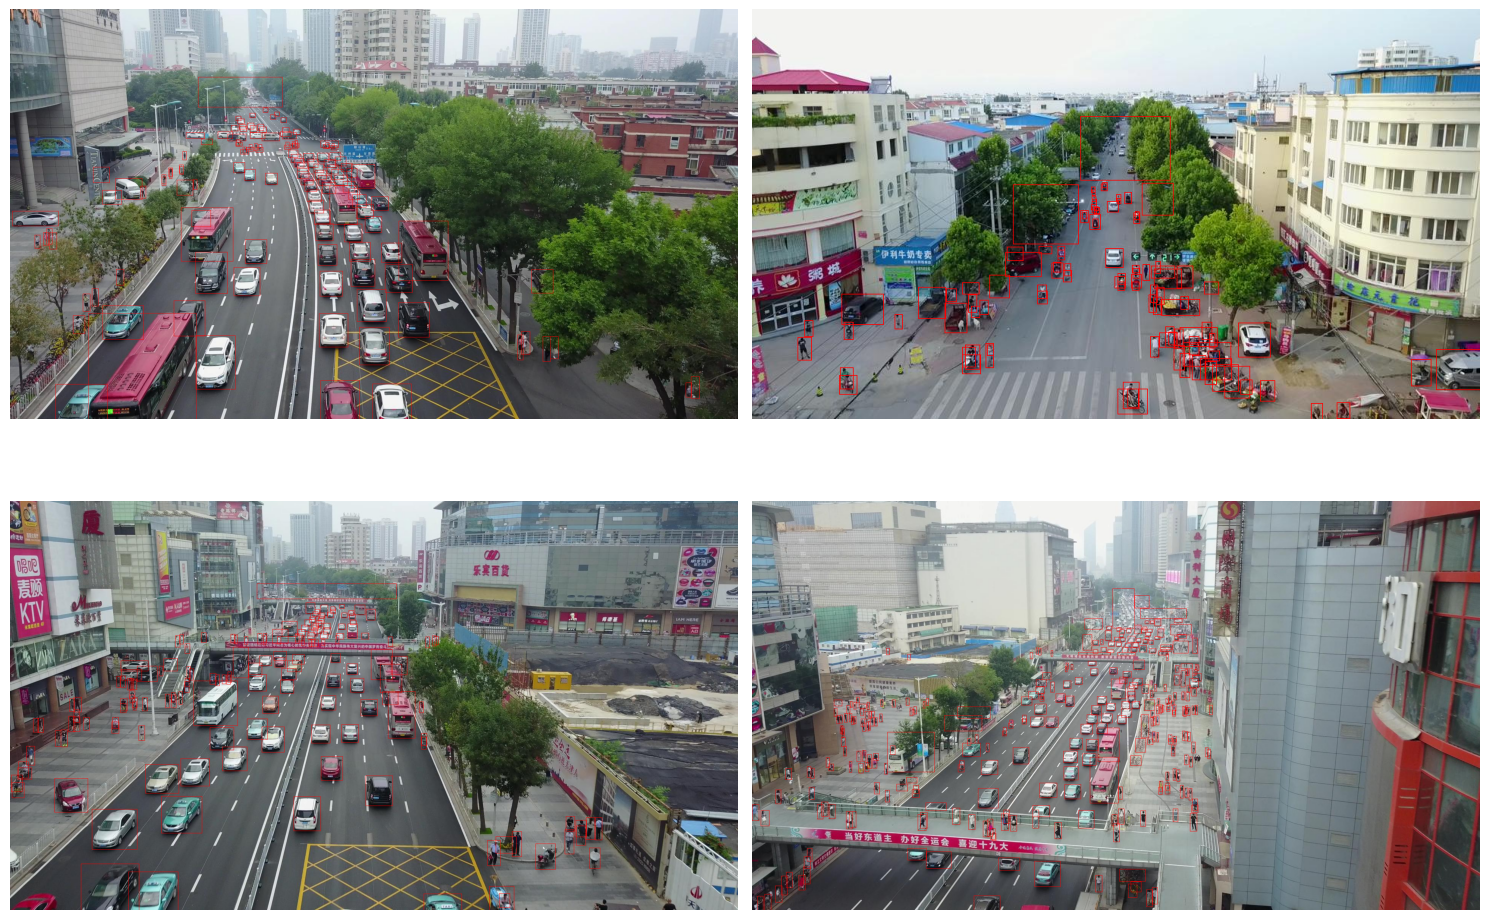

In [6]:
plot(
    image_paths='datasets/VisDrone/VisDrone2019-DET-train/images', 
    label_paths='datasets/VisDrone/VisDrone2019-DET-train/annotations',
    num_samples=4,
)

In [4]:
# plotting after yolo conversion

from PIL import Image, ImageDraw

# function to plot the bounding boxes to their respective images
def plot_box(image, bboxes, labels):
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
    
        x1, y1, x2, y2 = yolo2bbox(box, w, h)
        thickness = 1
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        cv2.rectangle(
            image,
            (x1, y1), (x2, y2),
            (0, 0, 255),
            thickness
        )
    return image


def yolo2bbox(bboxes, w, h):
    half_width = (bboxes[2] * w) / 2
    half_height = (bboxes[3] * h) / 2
    x_min = int((bboxes[0] * w) - half_width)
    y_min = int((bboxes[1] * h) - half_height)
    x_max = int((bboxes[0] * w) + half_width)
    y_max = int((bboxes[1] * h) + half_height)
    return [x_min, y_min, x_max, y_max]



def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    # print(all_images)
    
    # all_images.sort()data = line.strip().split(' ')

    num_images = len(all_images)
    # print(num_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,100)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        bboxes = []
        labels = []
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            label_lines = f.readlines()
            for label_line in label_lines:
                data = label_line.strip().split(' ')
                image_class = data[0]
                bounding_box = [float(val) for val in data[1:]]
                # img = Image.open("datasets/VisDrone/VisDrone2019-DET-train/images/"+image_name + ".jpg")
                bboxes.append(bounding_box)
                labels.append(image_class)
                # x_c, y_c, w, h = image_size
                # x_c = float(x_c)
                # y_c = float(y_c)
                # w = float(w)
                # h = float(h)
                # bboxes.append([x_c, y_c, w, h])
                # labels.append(label)
        result_image = plot_box(image, bboxes , labels)
        
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.title(image_name)
        plt.axis('off')

    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()
    
# with open(label_filepath, 'r', encoding='utf8') as file:
#     for line in file:
#         data = line.strip().split(' ')
#         image_class = data[0]
#         bounding_box = [float(val) for val in data[1:]]
#         bounding_boxes.append(yolo_to_bounding_box(image_class,bounding_box, img.size[0], img.size[1]))

plot(
    image_paths='datasets/VisDrone/VisDrone2019-DET-train/images', 
    label_paths='datasets/VisDrone/VisDrone2019-DET-train/labels',
    num_samples=4,
)



<Figure size 1500x1200 with 4 Axes>

In [10]:
#training the model using python
model = YOLO('yolov8m.pt')
results = model.predict('test1.mp4', save=True, imgsz=320, conf=0.5, line_width = 1)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 1 traffic light, 8.0ms
video 1/1 (2/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 2 traffic lights, 8.0ms
video 1/1 (3/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 1 traffic light, 7.0ms
video 1/1 (4/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 1 traffic light, 9.0ms
video 1/1 (5/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 (no detections), 9.0ms
video 1/1 (6/318) f:

In [14]:
# predicting on custom datasets
model = YOLO('runs/detect/train_medium_100/weights/best.pt')
results = model.predict('test1.mp4', save=True, imgsz=320, conf=0.5, line_width = 2)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 1 bus, 18.0ms
video 1/1 (2/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 17.0ms
video 1/1 (3/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 16 cars, 17.0ms
video 1/1 (4/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 1 van, 17.0ms
video 1/1 (5/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 12.0ms
video 1/1 (6/318) f:\Harshit\Harshit_Testi

In [13]:
results = model.predict('test1.mp4', save=True, imgsz=320, conf=0.5, line_width = 2, retina_masks=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 1 bus, 135.6ms
video 1/1 (2/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 7.0ms
video 1/1 (3/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 16 cars, 7.0ms
video 1/1 (4/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 1 van, 7.0ms
video 1/1 (5/318) f:\Harshit\Harshit_Testing\test1.mp4: 192x320 17 cars, 8.0ms
video 1/1 (6/318) f:\Harshit\Harshit_Testing\

In [3]:
# here i will train model with early stop - patience = 5; and autobatch sizing
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 150, patience = 5, imgsz = 640, save = True, device = [0], project = "yolov8_150_1_3", plots = True)


New https://pypi.org/project/ultralytics/8.1.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=150, time=None, patience=5, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=yolov8_150_1_3, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

train: Scanning F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to yolov8_150_1_3\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000546875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8_150_1_3\train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      33.1G      1.461       1.65     0.9932       2476        640: 100%|██████████| 185/185 [01:52<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]

                   all        548      38759      0.365      0.284      0.268      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150        30G      1.405      1.117     0.9428       2572        640: 100%|██████████| 185/185 [01:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        548      38759      0.415      0.315       0.31      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      25.8G      1.439      1.085     0.9466       1950        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759       0.41      0.314      0.307      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150        28G      1.434      1.078     0.9503       2394        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        548      38759      0.418      0.323      0.315      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      23.4G      1.403      1.031      0.941       3053        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759      0.448      0.323      0.327      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      30.9G      1.376      1.002     0.9357       2859        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        548      38759       0.47      0.332      0.335      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      28.5G      1.352     0.9769      0.933       2210        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        548      38759      0.444      0.343      0.343        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      25.2G      1.336     0.9547     0.9262       2218        640: 100%|██████████| 185/185 [01:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.457      0.343      0.352      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      28.4G      1.314      0.934     0.9227       1913        640: 100%|██████████| 185/185 [01:40<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        548      38759      0.464      0.352      0.358       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      18.8G      1.317     0.9297     0.9226       2433        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]

                   all        548      38759      0.461      0.351      0.355      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      26.1G      1.306     0.9152     0.9213       2479        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        548      38759      0.458      0.346      0.353       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      22.7G      1.288     0.9012     0.9193       2460        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.484      0.364      0.372      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      25.1G      1.278     0.8891     0.9134       2638        640: 100%|██████████| 185/185 [01:41<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.485      0.368      0.374      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      24.5G      1.269     0.8767     0.9117       2676        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759      0.478      0.377      0.382      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      24.5G       1.27     0.8697     0.9095       2415        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.494      0.366      0.382      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      23.3G      1.253     0.8613     0.9075       2581        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        548      38759      0.516      0.377       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150        24G      1.254     0.8548     0.9084       1884        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        548      38759      0.494      0.379       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      26.3G       1.25     0.8449     0.9063       3237        640: 100%|██████████| 185/185 [01:44<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        548      38759      0.502      0.371      0.385      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      30.5G      1.241     0.8417     0.9045       2721        640: 100%|██████████| 185/185 [01:43<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.503      0.384       0.39      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      26.9G      1.231     0.8275     0.9036       2044        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.496      0.386      0.395      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      22.8G      1.222     0.8184     0.9018       2531        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.504      0.387      0.399      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      21.8G      1.222     0.8153     0.8999       3005        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.511      0.387      0.399      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      24.4G      1.217      0.809     0.8978       2103        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.519      0.392      0.404      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      25.7G       1.21     0.8017     0.8991       2860        640: 100%|██████████| 185/185 [01:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.515      0.387      0.402      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      24.4G      1.204     0.7962     0.8957       2103        640: 100%|██████████| 185/185 [01:35<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759      0.524      0.386       0.41      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      33.4G      1.204     0.7947     0.8956       2226        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        548      38759      0.513      0.382      0.398      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150        24G       1.21      0.795      0.896       2216        640: 100%|██████████| 185/185 [01:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.524      0.393      0.407      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      24.7G      1.197     0.7806     0.8956       3106        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        548      38759       0.51      0.398      0.409      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      30.1G        1.2     0.7806     0.8955       2125        640: 100%|██████████| 185/185 [01:53<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.18it/s]

                   all        548      38759      0.506        0.4      0.407      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150        28G      1.184     0.7677     0.8915       3388        640: 100%|██████████| 185/185 [01:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        548      38759      0.526      0.397      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      25.8G      1.189     0.7682     0.8912       2445        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        548      38759      0.518      0.402      0.416      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      28.7G       1.18     0.7616     0.8903       2941        640: 100%|██████████| 185/185 [01:45<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        548      38759      0.522      0.401      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      21.4G      1.179     0.7593     0.8907       2606        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        548      38759      0.503      0.406      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      25.8G      1.174     0.7547     0.8902       2291        640: 100%|██████████| 185/185 [01:52<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        548      38759      0.527      0.395      0.411      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150        25G      1.176     0.7499     0.8898       3023        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        548      38759      0.518      0.403      0.415       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      20.7G      1.165      0.743     0.8877       3315        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      38759      0.524      0.401      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      23.1G       1.17     0.7433      0.886       3010        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759      0.515      0.409      0.421      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150        19G      1.157     0.7317     0.8855       3046        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759      0.529      0.403       0.42      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      29.6G       1.16      0.734     0.8857       2519        640: 100%|██████████| 185/185 [01:47<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.524      0.406       0.42      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      29.1G      1.159      0.729     0.8855       2207        640: 100%|██████████| 185/185 [01:42<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      38759      0.524      0.406      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      23.9G      1.148     0.7226     0.8846       2855        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      38759      0.527       0.41      0.424      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      28.8G       1.15     0.7202     0.8844       2316        640: 100%|██████████| 185/185 [01:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.503      0.412       0.42      0.255
Stopping training early as no improvement observed in last 5 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



42 epochs completed in 1.241 hours.
Optimizer stripped from yolov8_150_1_3\train\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_150_1_3\train\weights\best.pt, 52.0MB

Validating yolov8_150_1_3\train\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]


                   all        548      38759      0.514       0.41      0.421      0.256
            pedestrian        548       8844       0.56      0.418      0.458      0.212
                people        548       5125      0.625      0.271      0.349       0.14
               bicycle        548       1287      0.258      0.204      0.157     0.0694
                   car        548      14064      0.722      0.781      0.803      0.576
                   van        548       1975        0.5      0.488      0.473      0.337
                 truck        548        750      0.546      0.395      0.424      0.291
              tricycle        548       1045      0.421      0.319      0.299      0.171
       awning-tricycle        548        532      0.283      0.188      0.169      0.106
                   bus        548        251      0.687      0.578       0.62      0.452
                 motor        548       4886      0.535      0.455      0.462      0.209
Speed: 0.1ms preproce

In [2]:
# here i will train model with early stop - patience = 5; and autobatch sizing
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 150, patience = 15, imgsz = 640, save = True, device = [0], verbose = True, project = "yolov8_150_1_3_verbose", plots = True)


New https://pypi.org/project/ultralytics/8.1.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=150, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=yolov8_150_1_3_verbose, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to yolov8_150_1_3_verbose\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000546875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8_150_1_3_verbose\train2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      33.1G      1.461       1.65     0.9932       2476        640: 100%|██████████| 185/185 [01:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        548      38759      0.365      0.284      0.268      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150        30G      1.405      1.117     0.9428       2572        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        548      38759      0.415      0.315       0.31      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      25.8G      1.439      1.085     0.9466       1950        640: 100%|██████████| 185/185 [01:40<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759       0.41      0.314      0.307      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150        28G      1.434      1.078     0.9503       2394        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        548      38759      0.418      0.323      0.315      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      23.4G      1.403      1.031      0.941       3053        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        548      38759      0.448      0.323      0.327      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      30.9G      1.376      1.002     0.9357       2859        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759       0.47      0.332      0.335      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      28.5G      1.352     0.9769      0.933       2210        640: 100%|██████████| 185/185 [01:45<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.444      0.343      0.343        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      25.2G      1.336     0.9547     0.9262       2218        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      38759      0.457      0.343      0.352      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      28.4G      1.314      0.934     0.9227       1913        640: 100%|██████████| 185/185 [01:40<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.464      0.352      0.358       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      18.8G      1.317     0.9297     0.9226       2433        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.461      0.351      0.355      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      26.1G      1.306     0.9152     0.9213       2479        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        548      38759      0.458      0.346      0.353       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      22.7G      1.288     0.9012     0.9193       2460        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all        548      38759      0.484      0.364      0.372      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150        25G      1.278     0.8891     0.9134       2638        640: 100%|██████████| 185/185 [01:40<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all        548      38759      0.485      0.368      0.374      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      24.5G      1.269     0.8767     0.9117       2676        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        548      38759      0.478      0.377      0.382      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      24.5G       1.27     0.8697     0.9095       2415        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.494      0.366      0.382      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      23.3G      1.253     0.8613     0.9075       2581        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.516      0.377       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150        24G      1.254     0.8548     0.9084       1884        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      38759      0.494      0.379       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      26.3G       1.25     0.8449     0.9063       3237        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        548      38759      0.502      0.371      0.385      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      30.5G      1.241     0.8417     0.9045       2721        640: 100%|██████████| 185/185 [01:44<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]

                   all        548      38759      0.503      0.384       0.39      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      26.9G      1.231     0.8275     0.9036       2044        640: 100%|██████████| 185/185 [01:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      38759      0.496      0.386      0.395      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      22.8G      1.222     0.8184     0.9018       2531        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.504      0.387      0.399      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      21.8G      1.222     0.8153     0.8999       3005        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      38759      0.511      0.387      0.399      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      24.4G      1.217      0.809     0.8978       2103        640: 100%|██████████| 185/185 [01:37<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.519      0.392      0.404      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      25.7G       1.21     0.8017     0.8991       2860        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.515      0.387      0.402      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      24.4G      1.204     0.7962     0.8957       2103        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        548      38759      0.524      0.386       0.41      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      33.4G      1.204     0.7947     0.8956       2226        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        548      38759      0.513      0.382      0.398      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150        24G       1.21      0.795      0.896       2216        640: 100%|██████████| 185/185 [01:37<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        548      38759      0.524      0.393      0.407      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      24.7G      1.197     0.7806     0.8956       3106        640: 100%|██████████| 185/185 [01:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        548      38759       0.51      0.398      0.409      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      30.1G        1.2     0.7806     0.8955       2125        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        548      38759      0.506        0.4      0.407      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150        28G      1.184     0.7677     0.8915       3388        640: 100%|██████████| 185/185 [01:44<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        548      38759      0.526      0.397      0.415      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      25.8G      1.189     0.7682     0.8912       2445        640: 100%|██████████| 185/185 [01:38<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        548      38759      0.518      0.402      0.416      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      28.7G       1.18     0.7616     0.8903       2941        640: 100%|██████████| 185/185 [01:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      38759      0.522      0.401      0.417      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      21.4G      1.179     0.7593     0.8907       2606        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.503      0.406      0.413      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      25.8G      1.174     0.7547     0.8902       2291        640: 100%|██████████| 185/185 [01:47<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        548      38759      0.527      0.395      0.411      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150        25G      1.176     0.7499     0.8898       3023        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.518      0.403      0.415       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      20.7G      1.165      0.743     0.8877       3315        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.524      0.401      0.416      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      23.1G       1.17     0.7433      0.886       3010        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759      0.515      0.409      0.421      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150        19G      1.157     0.7317     0.8855       3046        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.529      0.403       0.42      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      29.6G       1.16      0.734     0.8857       2519        640: 100%|██████████| 185/185 [01:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      38759      0.524      0.406       0.42      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      29.1G      1.159      0.729     0.8855       2207        640: 100%|██████████| 185/185 [01:43<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.524      0.406      0.419      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150        24G      1.148     0.7226     0.8846       2855        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all        548      38759      0.527       0.41      0.424      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      28.8G       1.15     0.7202     0.8844       2316        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.503      0.412       0.42      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      25.6G      1.147     0.7183     0.8823       1876        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      38759      0.515      0.418      0.427      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      33.9G      1.151     0.7122     0.8816       1885        640: 100%|██████████| 185/185 [02:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        548      38759      0.518      0.416      0.427       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      25.7G      1.142     0.7082     0.8826       2491        640: 100%|██████████| 185/185 [01:43<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.525      0.411      0.426      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      23.6G      1.136     0.7039      0.881       2477        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        548      38759      0.541      0.407      0.428      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      25.4G      1.136      0.706     0.8821       2593        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      38759      0.538      0.406      0.427      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      27.7G      1.137     0.7012     0.8799       2185        640: 100%|██████████| 185/185 [02:00<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        548      38759       0.54      0.407      0.426      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      22.5G      1.126     0.6932     0.8793       3511        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        548      38759      0.525      0.407      0.421      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      27.4G      1.132     0.6906     0.8798       2071        640: 100%|██████████| 185/185 [01:40<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        548      38759       0.54      0.416       0.43      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      27.9G      1.123       0.69     0.8797       2939        640: 100%|██████████| 185/185 [01:41<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.528      0.415      0.427      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      28.5G      1.116     0.6826     0.8765       2271        640: 100%|██████████| 185/185 [01:44<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.533      0.416      0.431       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      25.1G      1.122     0.6811     0.8763       2297        640: 100%|██████████| 185/185 [01:40<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.529      0.416      0.427      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      25.9G      1.118     0.6813      0.876       2602        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      38759      0.528      0.412      0.425      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      27.7G      1.117     0.6763     0.8765       3608        640: 100%|██████████| 185/185 [01:40<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        548      38759      0.539      0.412      0.429       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      23.8G      1.109      0.672     0.8749       2350        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]

                   all        548      38759      0.524      0.414      0.424      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      31.3G      1.108     0.6703     0.8759       2677        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        548      38759      0.525      0.417      0.424      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150        24G      1.103     0.6618     0.8728       2740        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        548      38759      0.537      0.411      0.428      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      24.6G       1.11     0.6646     0.8737       3402        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        548      38759      0.536      0.411      0.427      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      24.7G      1.105     0.6605     0.8727       2449        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      38759      0.526      0.419       0.43      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      26.3G      1.098      0.657     0.8721       2468        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.522      0.416      0.427       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      27.2G      1.099     0.6528     0.8724       2142        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      38759      0.534       0.41      0.428       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      26.4G        1.1     0.6524      0.871       2302        640: 100%|██████████| 185/185 [01:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.542      0.409       0.43      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      21.7G      1.104     0.6558      0.871       2433        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.522       0.42      0.428       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      30.6G       1.09     0.6471     0.8716       2194        640: 100%|██████████| 185/185 [01:51<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        548      38759      0.526      0.425       0.43      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      21.5G      1.091     0.6438     0.8705       2607        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759      0.533      0.418      0.431       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      28.5G       1.09     0.6433     0.8709       1882        640: 100%|██████████| 185/185 [01:51<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        548      38759      0.529      0.414      0.428      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      23.3G       1.09     0.6394     0.8694       2362        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.547      0.415      0.432      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      23.3G      1.087     0.6381     0.8705       2532        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      38759      0.557      0.413      0.436      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      24.9G       1.08     0.6335     0.8673       2224        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759       0.54       0.42       0.43      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150        24G      1.079     0.6288     0.8692       3074        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      38759      0.542      0.422      0.438      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      27.8G      1.073     0.6283     0.8662       2005        640: 100%|██████████| 185/185 [01:41<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759      0.526      0.425      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      23.3G      1.071     0.6231     0.8656       2744        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.547       0.42      0.436      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      29.7G      1.077     0.6271     0.8658       2609        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.522      0.428      0.434      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      23.1G      1.065     0.6171     0.8668       3367        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      38759      0.533      0.422      0.433      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      22.8G       1.06      0.614     0.8646       2454        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759      0.543      0.418      0.436      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      28.2G      1.062      0.612     0.8645       2304        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759      0.537      0.419       0.43      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      28.6G      1.065     0.6156     0.8642       2138        640: 100%|██████████| 185/185 [02:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        548      38759      0.546      0.417      0.433      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      24.8G      1.059     0.6102     0.8638       2800        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.543      0.416      0.435      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      29.2G      1.064     0.6127     0.8646       2143        640: 100%|██████████| 185/185 [01:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      38759       0.56      0.414      0.437      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      25.6G      1.052      0.603      0.861       2678        640: 100%|██████████| 185/185 [01:44<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.532      0.423      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      27.6G      1.057     0.6073     0.8607       2531        640: 100%|██████████| 185/185 [01:40<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.539      0.417      0.435      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      21.7G      1.053     0.6028     0.8619       2304        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.544      0.418      0.438      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      24.9G      1.051     0.5992     0.8597       1583        640: 100%|██████████| 185/185 [01:38<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      38759      0.547      0.417      0.436      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      24.9G      1.042     0.5954     0.8598       2067        640: 100%|██████████| 185/185 [01:38<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759       0.54      0.423      0.437      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      28.3G      1.047     0.5975     0.8602       3173        640: 100%|██████████| 185/185 [01:44<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759       0.54       0.42      0.436      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      22.8G       1.04     0.5921     0.8589       2769        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      38759      0.535      0.422      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      21.8G      1.045     0.5911     0.8606       2605        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      38759      0.545      0.417      0.434      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      23.3G      1.046     0.5925     0.8604       2790        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        548      38759      0.542      0.418      0.434      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      26.3G      1.036     0.5862     0.8589       2391        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        548      38759       0.55      0.415      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      29.8G       1.04     0.5857      0.859       2348        640: 100%|██████████| 185/185 [02:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        548      38759      0.549      0.414      0.434      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      21.1G      1.033     0.5833     0.8582       2630        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      38759      0.541      0.419      0.435      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      26.2G      1.028     0.5783     0.8563       2044        640: 100%|██████████| 185/185 [01:44<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      38759      0.545      0.417      0.433      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      23.6G      1.034     0.5811     0.8578       2199        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      38759      0.539      0.422      0.437      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      26.4G      1.028     0.5777      0.856       2563        640: 100%|██████████| 185/185 [01:44<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      38759      0.543      0.421      0.438      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      25.7G      1.023     0.5756     0.8565       2781        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        548      38759      0.546      0.418      0.435      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150        20G      1.024     0.5725     0.8565       2162        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      38759      0.547      0.418      0.435      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      21.3G      1.016     0.5672     0.8556       3837        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      38759      0.553      0.414      0.435      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      22.2G       1.02     0.5719      0.854       2295        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      38759      0.555      0.414      0.435      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      26.1G      1.012     0.5658      0.854       2576        640: 100%|██████████| 185/185 [01:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      38759      0.564      0.411      0.433      0.264
Stopping training early as no improvement observed in last 15 epochs. Best results observed at epoch 85, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



100 epochs completed in 2.957 hours.
Optimizer stripped from yolov8_150_1_3_verbose\train2\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_150_1_3_verbose\train2\weights\best.pt, 52.0MB

Validating yolov8_150_1_3_verbose\train2\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.75s/it]


                   all        548      38759      0.542      0.422      0.438      0.267
            pedestrian        548       8844      0.577      0.446      0.484      0.227
                people        548       5125      0.613      0.316      0.369      0.151
               bicycle        548       1287       0.33      0.217      0.187     0.0832
                   car        548      14064      0.776      0.785      0.817      0.592
                   van        548       1975      0.544      0.473      0.477      0.342
                 truck        548        750      0.558      0.379      0.416      0.285
              tricycle        548       1045      0.435      0.344      0.318      0.179
       awning-tricycle        548        532      0.319      0.173      0.152     0.0945
                   bus        548        251      0.713      0.598      0.662      0.486
                 motor        548       4886       0.56      0.486      0.494       0.23
Speed: 0.1ms preproce

In [3]:
# here i will train model with early stop - patience = 5; and autobatch sizing
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 150, patience = 15, imgsz = 640, save = True, device = [0], project = "yolov8_150_1_3_removed", plots = True)


New https://pypi.org/project/ultralytics/8.1.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=150, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=yolov8_150_1_3_removed, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:07<00:00, 860.62it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache


val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<00:00, 670.90it/s]

val: New cache created: F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache


Plotting labels to yolov8_150_1_3_removed\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000546875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8_150_1_3_removed\train6
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      30.3G       1.44      1.592      0.989       2285        640: 100%|██████████| 185/185 [01:49<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      35895      0.464      0.346      0.347      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150        26G      1.385      1.068     0.9387       2486        640: 100%|██████████| 185/185 [01:45<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all        548      35895      0.512      0.369      0.388      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150        22G      1.419      1.042     0.9424       1836        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      35895      0.523      0.359      0.378      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      25.5G      1.415      1.035      0.946       2243        640: 100%|██████████| 185/185 [01:44<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      35895       0.51      0.386      0.394      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      24.9G      1.386     0.9889     0.9369       2905        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        548      35895      0.507      0.377      0.391      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      28.4G      1.357     0.9606     0.9312       2673        640: 100%|██████████| 185/185 [01:44<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        548      35895       0.52      0.388      0.405      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150        26G      1.335     0.9356     0.9291       2104        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]

                   all        548      35895      0.543      0.372      0.403       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      24.9G      1.319     0.9185     0.9231       2134        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        548      35895      0.569      0.393      0.425       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      26.1G      1.295     0.8976     0.9185       1860        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        548      35895      0.563      0.398      0.432      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      18.7G      1.296     0.8927     0.9189       2283        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        548      35895      0.527      0.398      0.415      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      23.3G      1.287     0.8776      0.917       2353        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      35895      0.554        0.4      0.425      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      24.1G      1.272     0.8659     0.9161       2330        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      35895      0.605      0.419      0.457      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      24.4G      1.263     0.8539     0.9105       2484        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        548      35895      0.569      0.427      0.453      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      24.8G      1.249     0.8388     0.9075       2546        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        548      35895      0.576      0.422      0.452      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      23.7G      1.252     0.8365      0.907       2272        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        548      35895      0.574      0.434      0.462      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      19.9G      1.234     0.8253     0.9043       2461        640: 100%|██████████| 185/185 [01:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.598      0.433      0.469      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      24.8G      1.236       0.82     0.9051       1778        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        548      35895      0.592      0.439      0.471      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      24.6G      1.232     0.8095     0.9029       3031        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.588      0.443      0.475      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      28.6G      1.222     0.8066     0.9007       2599        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        548      35895      0.594      0.441      0.481       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      29.1G      1.213     0.7933        0.9       1945        640: 100%|██████████| 185/185 [01:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.589      0.441      0.476      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      21.2G      1.206     0.7844     0.8989       2404        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.597      0.438      0.477      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      23.2G      1.202     0.7805      0.897       2726        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.599      0.447      0.482      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      23.7G      1.198     0.7773     0.8945       2003        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.607      0.454      0.489      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      25.5G      1.192      0.768     0.8957       2716        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        548      35895      0.604      0.463      0.495      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      25.8G      1.184     0.7643     0.8923       1989        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.611      0.445      0.487      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      26.8G      1.185      0.762      0.892       2144        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        548      35895      0.597      0.445      0.483      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      25.2G      1.192     0.7627     0.8924       2083        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.603      0.462      0.496      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      23.3G       1.18      0.748     0.8928       2931        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.609      0.459      0.496      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      25.2G      1.183     0.7495     0.8931       2032        640: 100%|██████████| 185/185 [01:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.612      0.455      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      25.4G      1.168      0.739     0.8886       3187        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.598      0.465      0.494      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      25.3G      1.173     0.7384     0.8878       2315        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      35895      0.615      0.452      0.492      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      27.6G      1.166      0.733     0.8876       2717        640: 100%|██████████| 185/185 [01:40<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.612      0.463      0.499      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      20.4G      1.161      0.728     0.8877       2475        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.614      0.462      0.502      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      30.6G      1.158     0.7256     0.8869       2153        640: 100%|██████████| 185/185 [02:09<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        548      35895      0.627      0.456        0.5      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      24.2G      1.158     0.7207     0.8857       2864        640: 100%|██████████| 185/185 [01:36<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.605      0.469      0.498      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      20.4G      1.148     0.7133     0.8853       3114        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.629      0.467      0.508      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      23.9G      1.152     0.7138     0.8826       2859        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      35895      0.623      0.467      0.506      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      16.9G      1.141     0.7042     0.8827       2906        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.626       0.47      0.505      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      25.6G      1.143     0.7052     0.8829       2418        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.624      0.464      0.502      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      25.8G      1.141     0.7008     0.8824       2067        640: 100%|██████████| 185/185 [01:38<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.607      0.472      0.505      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      24.7G      1.131      0.695      0.881       2734        640: 100%|██████████| 185/185 [01:37<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.632      0.465      0.506      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      24.6G      1.133     0.6922     0.8815       2168        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.621      0.466      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      24.3G      1.132      0.692     0.8801       1802        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        548      35895      0.615      0.474      0.511      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      28.3G      1.135     0.6863     0.8785       1791        640: 100%|██████████| 185/185 [01:53<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        548      35895      0.629       0.47      0.509       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      28.1G      1.126     0.6804     0.8797       2371        640: 100%|██████████| 185/185 [01:47<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.626      0.471      0.508      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      21.7G      1.119     0.6754      0.878       2393        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895      0.615      0.471      0.502      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      26.1G      1.116     0.6769     0.8781       2362        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.626      0.473      0.506       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      27.1G       1.12     0.6725     0.8764       2067        640: 100%|██████████| 185/185 [01:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        548      35895      0.625      0.474       0.51      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      21.9G       1.11     0.6694     0.8763       3302        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895       0.63      0.474      0.511      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      24.9G      1.115     0.6647     0.8774       1990        640: 100%|██████████| 185/185 [01:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        548      35895      0.631      0.471      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      25.5G      1.108      0.665     0.8767       2749        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.632       0.47      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      26.9G        1.1     0.6572     0.8734       2123        640: 100%|██████████| 185/185 [01:41<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        548      35895      0.605      0.476      0.509      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      24.7G      1.104     0.6571     0.8736       2122        640: 100%|██████████| 185/185 [01:38<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      35895      0.626      0.472      0.508      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      25.7G        1.1     0.6546     0.8719       2463        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        548      35895      0.596      0.482      0.508      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      27.8G      1.099     0.6529     0.8739       3403        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      35895      0.621      0.481      0.513      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      22.6G      1.092     0.6475     0.8719       2250        640: 100%|██████████| 185/185 [01:35<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        548      35895      0.618      0.478      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      27.1G      1.092     0.6468      0.873       2511        640: 100%|██████████| 185/185 [01:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.627      0.474      0.505       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      23.6G      1.084      0.637     0.8702       2601        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        548      35895      0.633      0.469      0.512      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      24.3G      1.094     0.6408     0.8712       3252        640: 100%|██████████| 185/185 [01:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.647      0.469      0.516      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      23.6G      1.087     0.6366     0.8703       2322        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.615      0.477      0.511      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      23.8G      1.083     0.6342     0.8701       2384        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      35895      0.635      0.477      0.515      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      26.4G      1.083     0.6299     0.8691       1998        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      35895      0.629      0.478      0.516      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      25.8G      1.083     0.6284      0.869       2154        640: 100%|██████████| 185/185 [01:38<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]

                   all        548      35895      0.651      0.466      0.514      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      22.9G      1.087     0.6325     0.8676       2304        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        548      35895      0.628      0.477      0.515      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      31.7G      1.072     0.6232     0.8679       2085        640: 100%|██████████| 185/185 [01:47<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.636      0.483       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      21.8G      1.075     0.6219     0.8681       2468        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.628      0.487      0.521      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      26.5G      1.073     0.6179      0.868       1795        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.642      0.483      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      21.9G      1.073     0.6172     0.8665       2263        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]

                   all        548      35895      0.639       0.48      0.523      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      21.6G      1.069     0.6145     0.8674       2452        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.643      0.483      0.521      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      21.6G      1.064      0.611     0.8647       2076        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]

                   all        548      35895      0.621      0.483      0.518      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      22.9G      1.062     0.6067     0.8665       2899        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.648      0.474      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      26.6G      1.057      0.606     0.8634       1894        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.641       0.48       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      22.9G      1.055     0.6012     0.8634       2538        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      35895      0.641      0.486      0.523      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      28.8G      1.059     0.6036     0.8633       2421        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.631      0.487      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      22.8G      1.049     0.5953     0.8644       3196        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895      0.648      0.473      0.515       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      22.4G      1.043     0.5921     0.8618       2332        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        548      35895      0.645      0.484       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      27.5G      1.045     0.5901     0.8617       2166        640: 100%|██████████| 185/185 [01:40<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      35895      0.638      0.483      0.517      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      26.2G      1.049     0.5936     0.8614       2056        640: 100%|██████████| 185/185 [01:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

                   all        548      35895      0.642      0.484       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      24.3G      1.041     0.5891     0.8609       2673        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        548      35895       0.64      0.484      0.522      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      26.2G      1.047     0.5917      0.861       2048        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        548      35895       0.64       0.48      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      26.7G      1.036     0.5824     0.8589       2583        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        548      35895       0.65      0.479      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      24.1G      1.039     0.5849     0.8576       2393        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        548      35895      0.628      0.487      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      21.5G      1.038     0.5827     0.8588       2201        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.625      0.489      0.522      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      23.9G      1.034     0.5794     0.8569       1481        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.631      0.489      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      23.5G      1.026      0.575     0.8573       1947        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        548      35895      0.643      0.476      0.519      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      27.3G      1.029     0.5758      0.858       2943        640: 100%|██████████| 185/185 [01:39<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.638      0.483      0.521      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      25.4G      1.025     0.5724     0.8566       2603        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]

                   all        548      35895      0.627      0.484      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      21.3G      1.028     0.5707     0.8579       2471        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        548      35895      0.645      0.483      0.523      0.323
Stopping training early as no improvement observed in last 15 epochs. Best results observed at epoch 73, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



88 epochs completed in 2.550 hours.
Optimizer stripped from yolov8_150_1_3_removed\train6\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_150_1_3_removed\train6\weights\best.pt, 52.0MB

Validating yolov8_150_1_3_removed\train6\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]


                   all        548      35895      0.643      0.485      0.523      0.325
            pedestrian        548       8844      0.594      0.436      0.484      0.227
                people        548       5125      0.607      0.343      0.389      0.153
                   car        548      14064      0.787      0.773      0.812      0.589
                   van        548       1975      0.568      0.467      0.472      0.339
                 truck        548        750       0.58      0.381      0.415      0.289
                   bus        548        251      0.797      0.574      0.637      0.478
                 motor        548       4886      0.567      0.422      0.449      0.202
Speed: 0.1ms preprocess, 2.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolov8_150_1_3_removed\train6


In [3]:

model = YOLO('yolov8m.pt') 
model = YOLO('yolov8_150_1_3_removed/train6/weights/best.pt')  # load a custom model

# # Validate the model
metrics = model.val( data = 'visdrone.yaml')  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.20it/s]


                   all        548      35895      0.641      0.486      0.523      0.327
            pedestrian        548       8844      0.594      0.438      0.484       0.23
                people        548       5125      0.608      0.345       0.39      0.154
                   car        548      14064      0.786      0.774      0.812      0.591
                   van        548       1975      0.567      0.468      0.473       0.34
                 truck        548        750      0.576      0.381      0.415      0.289
                   bus        548        251      0.792      0.574      0.637      0.482
                 motor        548       4886      0.564      0.423       0.45      0.204
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs_results\detect\val7


In [9]:
metrics.box.map    # map50-95
metrics.box.map50  # map50
# metrics.box.map75  # map75
# metrics.box.maps 
# metrics.confusion_matrix

0.5230234305104304

In [10]:
metrics.confusion_matrix

In [12]:

model = YOLO('yolov8m.pt') 
model = YOLO('yolov8_150_1_3_removed/train6/weights/best.pt')  # load a custom model

# # Validate the model
metrics = model.val( data = r'F:\Harshit\Harshit_Testing\datasets\visdrone1.yaml')  # no arguments needed, dataset and settings remembered



Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:15<00:00,  2.27it/s]


                   all        548      35895      0.641      0.486      0.523      0.327
            pedestrian        548       8844      0.594      0.438      0.484       0.23
                people        548       5125      0.608      0.345       0.39      0.154
                   car        548      14064      0.786      0.774      0.812      0.591
                   van        548       1975      0.567      0.468      0.473       0.34
                 truck        548        750      0.576      0.381      0.415      0.289
                   bus        548        251      0.792      0.574      0.637      0.482
                 motor        548       4886      0.564      0.423       0.45      0.204
Speed: 0.2ms preprocess, 4.7ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs_results\detect\val9


In [2]:
# here i will train model with early stop - patience = 5; and autobatch sizing
# COMET_API_KEY=
## import comet_ml at the top of your file
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="YOLOV8",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 150, patience = 15, imgsz = 640, save = True, device = [0], project = "YOLOV8", plots = True, save_period=1, save_json=True,)


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)


COMET INFO: Valid Comet API Key saved in C:\Users\RT Lab\.comet.config (set COMET_CONFIG to change where it is saved).
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testing' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/harsh123-baba/yolov8/e2885ef061634b10ab65284bf05d161d



New https://pypi.org/project/ultralytics/8.1.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=150, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=1, cache=False, device=[0], workers=8, project=YOLOV8, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fal

100%|██████████| 6.23M/6.23M [00:00<00:00, 20.5MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640
AutoBatch: CUDA:0 (Quadro RTX 6000) 24.00G total, 0.30G reserved, 0.23G allocated, 23.47G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25862110       79.09         0.810          23.1         50.43        (1, 3, 640, 640)                    list
    25862110       158.2         1.168         22.45         43.92        (2, 3, 640, 640)                    list
    25862110       316.4         1.860         30.58         48.15        (4, 3, 640, 640)                    list
    25862110       632.8         3.242         49.45         56.61        (8, 3, 640, 640)                    list
    25862110        1266         6.556         93.04         83.28       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 35 for CUDA:0 14.26G/24.00G (59%) ✅


train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to YOLOV8\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000546875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLOV8\train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      30.3G       1.44      1.592      0.989       2285        640: 100%|██████████| 185/185 [01:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        548      35895      0.464      0.346      0.347      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      26.1G      1.385      1.068     0.9387       2486        640: 100%|██████████| 185/185 [01:41<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.512      0.369      0.388      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150        22G      1.419      1.042     0.9424       1836        640: 100%|██████████| 185/185 [01:32<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.523      0.359      0.378      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      25.4G      1.415      1.035      0.946       2243        640: 100%|██████████| 185/185 [01:38<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895       0.51      0.388      0.394      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      24.9G      1.386     0.9889     0.9369       2905        640: 100%|██████████| 185/185 [02:46<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.63s/it]

                   all        548      35895      0.507      0.377      0.391      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      17.1G      1.322     0.9599      0.932       2969        640:   2%|▏         | 3/185 [00:01<01:42,  1.78it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpmjxdqxfu, upload type: 'model-element'
      6/150      28.4G      1.357     0.9606     0.9312       2673        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        548      35895       0.52      0.388      0.405      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      26.1G      1.335     0.9356     0.9291       2104        640: 100%|██████████| 185/185 [01:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.543      0.372      0.404       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      24.9G      1.321     0.9154     0.9244       2867        640:  66%|██████▌   | 122/185 [01:05<00:54,  1.16it/s]COMET ERROR: Heartbeat processing error
      8/150      24.9G      1.319     0.9185     0.9231       2134        640: 100%|██████████| 185/185 [02:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        548      35895      0.569      0.393      0.425       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      22.8G      1.301     0.9063      0.922       2055        640:  22%|██▏       | 40/185 [00:20<01:11,  2.03it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpi0051eun, upload type: 'model-element'
      9/150      22.8G      1.302     0.8998     0.9202       3175        640:  37%|███▋      | 68/185 [00:34<00:57,  2.05it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpi0051eun, upload type: 'model-element'
      9/150      26.1G      1.295     0.8976     0.9185       1860        640: 100%|██████████| 185/185 [02:31<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:21<00:00,  2.69s

                   all        548      35895      0.559      0.399      0.432      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      18.7G      1.296     0.8927     0.9189       2283        640: 100%|██████████| 185/185 [01:32<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.527      0.398      0.415      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      23.3G      1.287     0.8776      0.917       2353        640: 100%|██████████| 185/185 [01:32<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.554        0.4      0.425      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      24.1G      1.272     0.8659     0.9161       2330        640: 100%|██████████| 185/185 [01:32<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        548      35895      0.605      0.419      0.457      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      24.4G      1.263     0.8539     0.9105       2484        640: 100%|██████████| 185/185 [01:37<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        548      35895      0.569      0.427      0.453      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      15.9G      1.253     0.8338     0.9054       1997        640:   3%|▎         | 5/185 [00:03<01:56,  1.54it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpblfcwce8, upload type: 'model-element'
     14/150      15.9G      1.265       0.85     0.9122       2708        640:  18%|█▊        | 34/185 [00:18<01:17,  1.94it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpblfcwce8, upload type: 'model-element'
     14/150      15.9G      1.247     0.8411     0.9092       2467        640:  34%|███▍      | 63/185 [00:33<01:01,  1.98it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Come

                   all        548      35895      0.576      0.421      0.452      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      16.6G      1.263     0.8558     0.9083       2794        640:   3%|▎         | 5/185 [00:02<01:35,  1.88it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpcvzk3fl7, upload type: 'model-element'
COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpblfcwce8, upload type: 'model-element'
     15/150      21.8G      1.264     0.8451     0.9097       3514        640:  25%|██▌       | 47/185 [00:24<01:10,  1.95it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpcvzk3fl7, upload type: 'model-element'
COMET ERROR: S3 di

                   all        548      35895      0.574      0.434      0.462      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      19.9G      1.234     0.8253     0.9043       2461        640: 100%|██████████| 185/185 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.598      0.433      0.469      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      15.3G       1.19     0.8035     0.8948       2948        640:   2%|▏         | 3/185 [00:01<01:35,  1.91it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp79o5ixmi, upload type: 'model-element'
     17/150        18G      1.224     0.8149     0.9027       2482        640:  29%|██▉       | 54/185 [00:26<01:06,  1.98it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp79o5ixmi, upload type: 'model-element'
     17/150        18G      1.233     0.8179     0.9042       3110        640:  46%|████▌     | 85/185 [00:42<00:51,  1.94it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Come

                   all        548      35895      0.592      0.439      0.471      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      18.7G      1.248     0.8268     0.9073       2164        640:  10%|▉         | 18/185 [00:09<01:22,  2.03it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp79o5ixmi, upload type: 'model-element'
COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmptzojr4cx, upload type: 'model-element'
     18/150      24.6G      1.247     0.8227      0.906       2645        640:  26%|██▋       | 49/185 [00:25<01:07,  2.03it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmptzojr4cx, upload type: 'model-element'
COMET ERROR: S3 d

                   all        548      35895      0.588      0.443      0.475      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      28.6G      1.222     0.8066     0.9007       2599        640: 100%|██████████| 185/185 [05:04<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:31<00:00,  3.93s/it]

                   all        548      35895      0.594      0.441      0.481       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      29.1G      1.213     0.7933        0.9       1945        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.587      0.441      0.476      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      18.7G      1.216     0.7958     0.8996       2981        640:  20%|██        | 37/185 [00:19<01:15,  1.97it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpb1z94ant, upload type: 'model-element'
     21/150      21.2G      1.211     0.7902     0.8988       2469        640:  37%|███▋      | 68/185 [00:34<00:57,  2.04it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpb1z94ant, upload type: 'model-element'
     21/150      21.2G      1.206     0.7844     0.8989       2404        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44i

                   all        548      35895      0.597      0.438      0.477      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      16.9G      1.202     0.7677     0.8915       3031        640:   1%|          | 2/185 [00:01<02:16,  1.35it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp17ht77ni, upload type: 'model-element'
     22/150      18.5G      1.197     0.7875     0.8981       2259        640:  15%|█▌        | 28/185 [00:16<01:31,  1.72it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp17ht77ni, upload type: 'model-element'
     22/150      20.8G        1.2     0.7851     0.8981       2694        640:  29%|██▊       | 53/185 [00:30<01:16,  1.73it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Come

                   all        548      35895      0.599      0.447      0.482      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      23.7G      1.198     0.7773     0.8945       2003        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.607      0.454      0.489      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      16.4G      1.201     0.7657     0.8977       2296        640:   1%|          | 2/185 [00:01<02:18,  1.32it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmphzmotavy, upload type: 'model-element'
     24/150        20G      1.203     0.7692     0.8946       2664        640:  14%|█▍        | 26/185 [00:15<01:31,  1.73it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmphzmotavy, upload type: 'model-element'
     24/150        20G        1.2     0.7697     0.8973       3005        640:  28%|██▊       | 51/185 [00:29<01:15,  1.77it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Come

                   all        548      35895      0.604      0.463      0.495      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      25.8G      1.184     0.7643     0.8923       1989        640: 100%|██████████| 185/185 [01:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.611      0.445      0.487      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      26.8G      1.185      0.762      0.892       2144        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        548      35895      0.597      0.445      0.483      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      25.2G      1.192     0.7627     0.8924       2083        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.603      0.462      0.496      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      23.3G       1.18      0.748     0.8928       2931        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.39it/s]

                   all        548      35895      0.609      0.459      0.496      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      25.2G      1.183     0.7495     0.8931       2032        640: 100%|██████████| 185/185 [01:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.612      0.455      0.492      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      25.4G      1.168      0.739     0.8886       3187        640: 100%|██████████| 185/185 [02:12<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]

                   all        548      35895      0.598      0.465      0.494      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      25.3G      1.173     0.7384     0.8878       2315        640: 100%|██████████| 185/185 [02:14<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        548      35895      0.614      0.453      0.492      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      27.6G      1.166      0.733     0.8876       2717        640: 100%|██████████| 185/185 [01:56<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        548      35895      0.612      0.463      0.499      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      20.5G      1.161      0.728     0.8877       2475        640: 100%|██████████| 185/185 [01:47<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.614      0.462      0.502      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      30.6G      1.158     0.7256     0.8869       2153        640: 100%|██████████| 185/185 [02:15<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        548      35895      0.627      0.457        0.5      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      15.6G        1.2     0.7217     0.8861       2083        640:   1%|          | 2/185 [00:01<02:05,  1.46it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpowrkou7v, upload type: 'model-element'
     35/150      20.1G      1.159     0.7152     0.8868       2337        640:  15%|█▍        | 27/185 [00:15<01:31,  1.73it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpowrkou7v, upload type: 'model-element'
     35/150      20.1G      1.151     0.7126     0.8858       2482        640:  28%|██▊       | 52/185 [00:30<01:15,  1.77it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Come

                   all        548      35895      0.606      0.468      0.498      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      15.7G      1.157      0.723     0.8847       3045        640:   1%|          | 2/185 [00:01<02:15,  1.35it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp_y4cggle, upload type: 'model-element'
     36/150      18.1G      1.138     0.7225     0.8829       2336        640:   4%|▍         | 7/185 [00:04<01:45,  1.68it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpowrkou7v, upload type: 'model-element'
     36/150      20.4G      1.148     0.7188     0.8876       2298        640:  15%|█▌        | 28/185 [00:16<01:28,  1.78it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet

                   all        548      35895      0.629      0.467      0.508      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      23.9G      1.152     0.7138     0.8826       2859        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.623      0.467      0.506      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      16.9G      1.141     0.7042     0.8827       2906        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.626       0.47      0.505      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      25.6G      1.143     0.7052     0.8829       2418        640: 100%|██████████| 185/185 [01:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.624      0.464      0.502      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      25.8G      1.141     0.7008     0.8824       2067        640: 100%|██████████| 185/185 [01:59<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]

                   all        548      35895      0.607      0.472      0.505      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      24.7G      1.131      0.695      0.881       2734        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.632      0.465      0.506      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      24.6G      1.133     0.6922     0.8815       2168        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.621      0.466      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      24.3G      1.132      0.692     0.8801       1802        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.615      0.474      0.511      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      28.3G      1.135     0.6863     0.8785       1791        640: 100%|██████████| 185/185 [02:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        548      35895      0.629       0.47      0.509       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      28.1G      1.126     0.6804     0.8797       2371        640: 100%|██████████| 185/185 [05:07<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.94s/it]

                   all        548      35895      0.626      0.471      0.508      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      21.7G      1.119     0.6754      0.878       2393        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.615      0.471      0.502      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      26.1G      1.116     0.6769     0.8781       2362        640: 100%|██████████| 185/185 [01:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.626      0.473      0.506       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      27.1G       1.12     0.6725     0.8764       2067        640: 100%|██████████| 185/185 [01:53<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.625      0.474       0.51      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      21.9G       1.11     0.6694     0.8763       3302        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        548      35895       0.63      0.474      0.511      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      24.9G      1.115     0.6647     0.8774       1990        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        548      35895      0.633       0.47      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      25.5G      1.108      0.665     0.8767       2749        640: 100%|██████████| 185/185 [01:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        548      35895      0.632       0.47      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      26.9G        1.1     0.6572     0.8734       2123        640: 100%|██████████| 185/185 [01:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.605      0.476      0.509      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      14.8G      1.092     0.6597     0.8797       2093        640:   1%|          | 2/185 [00:01<01:57,  1.56it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpo_1kz5me, upload type: 'model-element'
     53/150      24.7G      1.104     0.6585     0.8718       2585        640:  15%|█▌        | 28/185 [00:16<01:30,  1.74it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmpo_1kz5me, upload type: 'model-element'
     53/150      24.7G      1.104     0.6571     0.8736       2122        640: 100%|██████████| 185/185 [01:47<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it

                   all        548      35895      0.626      0.472      0.508      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      25.7G        1.1     0.6546     0.8719       2463        640: 100%|██████████| 185/185 [01:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.596      0.482      0.508      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      27.8G      1.099     0.6529     0.8739       3403        640: 100%|██████████| 185/185 [03:06<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.16s/it]

                   all        548      35895      0.621      0.481      0.513      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      22.6G      1.092     0.6475     0.8719       2250        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.618      0.478      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      27.1G      1.092     0.6468      0.873       2511        640: 100%|██████████| 185/185 [01:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.627      0.474      0.505       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      23.6G      1.083     0.6388     0.8734       2693        640:   8%|▊         | 14/185 [00:08<01:39,  1.72it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp91z9q4cp, upload type: 'model-element'
     58/150      23.6G      1.084      0.637     0.8702       2601        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.632      0.469      0.512      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      14.9G      1.057     0.6365     0.8721       2398        640:   1%|          | 2/185 [00:01<01:55,  1.58it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp7gbq97_2, upload type: 'model-element'
     59/150      24.3G      1.094     0.6408     0.8712       3252        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.646      0.469      0.516      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      23.6G      1.087     0.6366     0.8703       2322        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.615      0.477      0.511      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      23.9G      1.083     0.6342     0.8701       2384        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.635      0.477      0.515      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      26.4G      1.083     0.6299     0.8691       1998        640: 100%|██████████| 185/185 [01:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.629      0.478      0.516      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      25.8G      1.083     0.6284      0.869       2154        640: 100%|██████████| 185/185 [05:47<00:00,  1.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]

                   all        548      35895      0.651      0.466      0.514      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      22.9G      1.087     0.6325     0.8676       2304        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.628      0.477      0.515      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      31.7G      1.072     0.6232     0.8679       2085        640: 100%|██████████| 185/185 [01:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.636      0.483       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      21.8G      1.075     0.6219     0.8681       2468        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        548      35895      0.628      0.487      0.521      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      26.5G      1.073     0.6179      0.868       1795        640: 100%|██████████| 185/185 [03:28<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        548      35895      0.642      0.483      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      14.5G      1.091      0.623     0.8652       2378        640:   1%|          | 1/185 [00:00<02:52,  1.07it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp88g7ate1, upload type: 'model-element'
     68/150      18.2G      1.066     0.6112     0.8624       3028        640:  15%|█▌        | 28/185 [00:16<01:28,  1.77it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Comet backend'), file: C:\Users\RTLAB~1\AppData\Local\Temp\tmp5ur4bg3r\tmp88g7ate1, upload type: 'model-element'
     68/150      18.2G      1.074     0.6169     0.8652       2244        640:  29%|██▊       | 53/185 [00:31<01:15,  1.75it/s]COMET ERROR: S3 direct file upload failed: S3UploadError('Failed to start S3 direct upload due to recurrent connection error with Come

                   all        548      35895      0.639       0.48      0.523      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      21.6G      1.069     0.6145     0.8674       2452        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.643      0.483      0.521      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      21.6G      1.064      0.611     0.8647       2076        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        548      35895      0.621      0.483      0.518      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      22.9G      1.062     0.6067     0.8665       2899        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.648      0.474      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      26.6G      1.057      0.606     0.8634       1894        640: 100%|██████████| 185/185 [01:48<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.641       0.48       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      22.9G      1.055     0.6012     0.8634       2538        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.641      0.486      0.522      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      28.8G      1.059     0.6036     0.8633       2421        640: 100%|██████████| 185/185 [01:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.631      0.487      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      22.8G      1.049     0.5953     0.8644       3196        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.648      0.473      0.515       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      22.4G      1.043     0.5921     0.8618       2332        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.645      0.484       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      27.5G      1.045     0.5901     0.8617       2166        640: 100%|██████████| 185/185 [01:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.638      0.483      0.517      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      26.2G      1.049     0.5936     0.8614       2056        640: 100%|██████████| 185/185 [02:59<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:11<00:00,  1.47s/it]

                   all        548      35895      0.642      0.484       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      24.3G      1.041     0.5891     0.8609       2673        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895       0.64      0.484      0.522      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      26.2G      1.047     0.5917      0.861       2048        640: 100%|██████████| 185/185 [01:48<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895       0.64       0.48      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      26.7G      1.036     0.5824     0.8589       2583        640: 100%|██████████| 185/185 [06:49<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.39s/it]

                   all        548      35895       0.65      0.479      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      24.1G      1.039     0.5849     0.8576       2393        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.628      0.487      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      21.5G      1.038     0.5827     0.8588       2201        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.625      0.489      0.522      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      23.9G      1.034     0.5794     0.8569       1481        640: 100%|██████████| 185/185 [01:46<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        548      35895      0.631      0.489      0.522      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      23.5G      1.026      0.575     0.8573       1947        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.643      0.476      0.519      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      27.3G      1.029     0.5758      0.858       2943        640: 100%|██████████| 185/185 [01:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.638      0.483      0.521      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      25.4G      1.025     0.5724     0.8566       2603        640: 100%|██████████| 185/185 [01:47<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.627      0.484      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      21.3G      1.028     0.5707     0.8579       2471        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        548      35895      0.645      0.483      0.523      0.323
Stopping training early as no improvement observed in last 15 epochs. Best results observed at epoch 73, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



88 epochs completed in 3.182 hours.
Optimizer stripped from YOLOV8\train\weights\last.pt, 52.0MB
Optimizer stripped from YOLOV8\train\weights\best.pt, 52.0MB

Validating YOLOV8\train\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.84s/it]


                   all        548      35895      0.643      0.485      0.523      0.325
            pedestrian        548       8844      0.594      0.436      0.484      0.227
                people        548       5125      0.607      0.343      0.389      0.153
                   car        548      14064      0.787      0.773      0.812      0.589
                   van        548       1975      0.568      0.467      0.472      0.339
                 truck        548        750       0.58      0.381      0.415      0.289
                   bus        548        251      0.797      0.574      0.637      0.478
                 motor        548       4886      0.567      0.422      0.449      0.202
Speed: 0.1ms preprocess, 3.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Saving YOLOV8\train\predictions.json...
Results saved to YOLOV8\train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8/e2885ef061634b10ab65284bf05d161d
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [89]               : (0.0033153153153153156, 0.00985021981981982)
COMET INFO:     lr/pg1 [89]               : (0.0033153153153153156, 0.00985021981981982)
COMET INFO:     lr/pg2 [89]               : (0.0033153153153153156, 0.00985021981981982)
COMET INFO:     metrics/mAP50(B) [89]     : (0.34736, 0.52304)
COMET INFO:     metrics/mAP50-95(B) [89]  : (0.20472, 0.32532034753772066)
COMET INFO:     metrics/precision(B) [89] : (0.4641, 0.6514)
COMET INFO:     metrics/recall(B) [89]    : (0.34597, 0.48863)
COMET INFO:

In [6]:
# so here i will test my yolo model at videos
model = YOLO('YOLOV8/train/weights/best.pt')
results = model.predict('night_video.mp4', save=True, imgsz=320, conf=0.5, line_width = 2, retina_masks=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/300) f:\Harshit\Harshit_Testing\night_video.mp4: 192x320 (no detections), 8.8ms
video 1/1 (2/300) f:\Harshit\Harshit_Testing\night_video.mp4: 192x320 (no detections), 7.8ms
video 1/1 (3/300) f:\Harshit\Harshit_Testing\night_video.mp4: 192x320 (no detections), 7.8ms
video 1/1 (4/300) f:\Harshit\Harshit_Testing\night_video.mp4: 192x320 (no detections), 6.8ms
video 1/1 (5/300) f:\Harshit\Harshit_Testing\night_video.mp4: 192x320 (no detections

In [7]:
model = YOLO('YOLOV8/train/weights/best.pt')
results = model.predict('test_video_1.mp4', save=True, imgsz=320, conf=0.5, line_width = 2)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/480) f:\Harshit\Harshit_Testing\test_video_1.mp4: 192x320 11 cars, 7.8ms
video 1/1 (2/480) f:\Harshit\Harshit_Testing\test_video_1.mp4: 192x320 13 cars, 7.8ms
video 1/1 (3/480) f:\Harshit\Harshit_Testing\test_video_1.mp4: 192x320 13 cars, 7.8ms
video 1/1 (4/480) f:\Harshit\Harshit_Testing\test_video_1.mp4: 192x320 13 cars, 7.8ms
video 1/1 (5/480) f:\Harshit\Harshit_Testing\test_video_1.mp4: 192x320 12 cars, 7.8ms
video 1/1 (6/480) f:\Harsh

In [8]:
model = YOLO('YOLOV8/train/weights/best.pt')
results = model.predict('test_2.mp4', save=True, imgsz=320, conf=0.5, line_width = 2)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/961) f:\Harshit\Harshit_Testing\test_2.mp4: 192x320 1 truck, 42.9ms
video 1/1 (2/961) f:\Harshit\Harshit_Testing\test_2.mp4: 192x320 1 truck, 31.2ms
video 1/1 (3/961) f:\Harshit\Harshit_Testing\test_2.mp4: 192x320 1 truck, 27.3ms
video 1/1 (4/961) f:\Harshit\Harshit_Testing\test_2.mp4: 192x320 (no detections), 16.6ms
video 1/1 (5/961) f:\Harshit\Harshit_Testing\test_2.mp4: 192x320 1 truck, 13.7ms
video 1/1 (6/961) f:\Harshit\Harshit_Testin

In [11]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 150, patience = 15, imgsz = 640, save = True, device = [0], project = "yolov8_aug_train", plots = True, save_json=True)


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/c25ae85c1e484dc7aad9c7aa91b3bb0e
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=150, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=yolov8_aug_train, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels... 6471 images, 6471 backgrounds, 0 corrupt: 100%|██████████| 12942/12942 [00:06<00:00, 1904.94it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache


val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels... 1096 images, 0 backgrounds, 228 corrupt: 100%|██████████| 1096/1096 [00:05<00:00, 188.13it/s]

val: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\images\Aug_sher_0000001_05499_d_0000010.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0164      1.0028]
val: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\images\Aug_sher_0000001_08414_d_0000013.jpg: ignoring corrupt image/label: negative label values [  -0.055993]
val: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\images\Aug_sher_0000021_00800_d_0000003.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0134]
val: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\images\Aug_sher_0000023_00868_d_0000010.jpg: ignoring corrupt image/label: negative label values [ -0.0050206   -0.004743]
val: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\images\Aug_sher_0000026_01000_d_0000026.jpg: ignoring corrupt image/label: neg

val: New cache created: F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache
Plotting labels to yolov8_aug_train\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00053125), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8_aug_train\train3
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      30.1G      1.437      1.712     0.9788        440        640: 100%|██████████| 381/381 [04:05<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:20<00:00,  1.57s/it]


                   all        868      52778      0.416      0.251      0.251      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      24.1G       1.39      1.131     0.9398       1266        640: 100%|██████████| 381/381 [03:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]

                   all        868      52778      0.417      0.275      0.274      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150        26G      1.431      1.131     0.9488        802        640: 100%|██████████| 381/381 [03:10<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778      0.398      0.235      0.238      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      27.6G       1.46       1.18     0.9589        930        640: 100%|██████████| 381/381 [03:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]

                   all        868      52778      0.417      0.243      0.249      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      22.2G      1.436      1.118     0.9505        798        640: 100%|██████████| 381/381 [03:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.412      0.249      0.258      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      24.5G      1.392      1.073     0.9454        925        640: 100%|██████████| 381/381 [08:46<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:33<00:00,  2.57s/it]

                   all        868      52778       0.44      0.271      0.281      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      20.7G       1.37       1.03     0.9379       1377        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]

                   all        868      52778      0.478       0.28      0.298      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      25.3G       1.34     0.9972     0.9316        966        640: 100%|██████████| 381/381 [03:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all        868      52778      0.475       0.29      0.304      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      27.1G      1.338     0.9805     0.9297       1253        640: 100%|██████████| 381/381 [18:22<00:00,  2.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:37<00:00,  2.91s/it]

                   all        868      52778      0.483      0.283      0.307       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      19.8G      1.325     0.9643     0.9266       1087        640: 100%|██████████| 381/381 [03:05<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]

                   all        868      52778      0.487      0.288      0.305      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      18.2G      1.306     0.9512     0.9232        914        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.495      0.289      0.314      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      23.6G      1.294     0.9246     0.9191       1096        640: 100%|██████████| 381/381 [03:24<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]

                   all        868      52778      0.497      0.301      0.319       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      27.1G      1.286     0.9131     0.9177        968        640: 100%|██████████| 381/381 [03:41<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]

                   all        868      52778      0.516      0.301      0.322      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      19.1G      1.285     0.9126     0.9169        625        640: 100%|██████████| 381/381 [03:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]

                   all        868      52778      0.519      0.312      0.333        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      25.2G       1.27     0.8961     0.9132        711        640: 100%|██████████| 381/381 [03:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]

                   all        868      52778      0.534      0.305      0.333      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      21.5G      1.262      0.884     0.9122       1379        640: 100%|██████████| 381/381 [03:19<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]

                   all        868      52778      0.523      0.313      0.334        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150        27G      1.255     0.8763     0.9103        940        640: 100%|██████████| 381/381 [03:46<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]

                   all        868      52778      0.525       0.31      0.338      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      26.5G      1.244     0.8628     0.9088        811        640: 100%|██████████| 381/381 [03:32<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]

                   all        868      52778      0.538      0.315      0.341      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      27.7G      1.245     0.8635      0.909       1081        640: 100%|██████████| 381/381 [11:51<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:42<00:00,  3.28s/it]

                   all        868      52778      0.538      0.317      0.345       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      24.4G      1.236     0.8515     0.9071        708        640: 100%|██████████| 381/381 [04:00<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]

                   all        868      52778      0.536      0.324      0.347      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      27.5G      1.234     0.8486      0.905       1117        640: 100%|██████████| 381/381 [04:30<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.34it/s]

                   all        868      52778      0.548      0.325      0.351      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      14.2G      1.192     0.8241     0.8953       1110        640:   1%|          | 2/381 [00:01<03:25,  1.84it/s]COMET ERROR: Heartbeat processing error
     22/150      19.7G      1.234      0.842     0.9044       1027        640: 100%|██████████| 381/381 [03:24<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]

                   all        868      52778      0.559      0.322      0.354      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      21.7G       1.23     0.8368     0.9023       1093        640: 100%|██████████| 381/381 [03:21<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]

                   all        868      52778      0.541      0.323       0.35      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      24.3G      1.218     0.8298     0.9012       1120        640: 100%|██████████| 381/381 [03:33<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]

                   all        868      52778      0.557      0.323      0.355      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      29.1G      1.223     0.8248     0.9015        846        640: 100%|██████████| 381/381 [12:34<00:00,  1.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:41<00:00,  3.19s/it]


                   all        868      52778      0.551      0.326      0.358      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      20.8G      1.202     0.8127     0.9003        871        640: 100%|██████████| 381/381 [03:25<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]


                   all        868      52778       0.57      0.325      0.358       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      25.8G      1.205     0.8102     0.8982        622        640: 100%|██████████| 381/381 [04:44<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]

                   all        868      52778       0.55      0.331       0.36      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      30.8G      1.201     0.8021     0.8982        850        640: 100%|██████████| 381/381 [04:11<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]

                   all        868      52778      0.565      0.327      0.361       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      33.2G      1.201     0.8005     0.8983        885        640: 100%|██████████| 381/381 [05:22<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:26<00:00,  6.67s/it]


                   all        868      52778      0.574      0.327      0.359       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      27.8G       1.19     0.7919      0.896        614        640: 100%|██████████| 381/381 [04:00<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]


                   all        868      52778      0.573      0.326      0.359      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      24.7G      1.191     0.7892     0.8951        754        640: 100%|██████████| 381/381 [04:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]

                   all        868      52778      0.576      0.327      0.362       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      23.8G      1.187     0.7884     0.8936        902        640: 100%|██████████| 381/381 [03:23<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]

                   all        868      52778       0.57      0.331      0.363      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      22.2G      1.186     0.7828     0.8933       1623        640: 100%|██████████| 381/381 [03:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        868      52778      0.567      0.332      0.367      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      25.1G      1.186     0.7802     0.8929        803        640: 100%|██████████| 381/381 [03:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]

                   all        868      52778      0.585      0.337      0.371      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      27.7G      1.182     0.7754     0.8931        908        640: 100%|██████████| 381/381 [03:25<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]

                   all        868      52778      0.579      0.332      0.368      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      21.6G      1.187     0.7771     0.8917        647        640: 100%|██████████| 381/381 [21:53<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:25<00:00, 11.22s/it]


                   all        868      52778      0.581      0.337      0.371      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150        22G      1.173     0.7649     0.8926        807        640: 100%|██████████| 381/381 [04:15<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.24it/s]

                   all        868      52778      0.573      0.335      0.369      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      30.6G       1.17     0.7625     0.8892        979        640: 100%|██████████| 381/381 [13:20<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:44<00:00,  3.44s/it]


                   all        868      52778      0.582      0.339      0.375      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      24.1G       1.17     0.7633     0.8914        599        640: 100%|██████████| 381/381 [03:49<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all        868      52778      0.575      0.338      0.372      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      29.5G      1.166     0.7552     0.8891       1087        640: 100%|██████████| 381/381 [26:46<00:00,  4.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:04<00:00,  4.96s/it]

                   all        868      52778      0.578      0.339      0.373       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      23.2G      1.163     0.7475     0.8874       1031        640: 100%|██████████| 381/381 [03:45<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]

                   all        868      52778      0.602      0.337      0.375      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      24.2G      1.154     0.7424     0.8864       1211        640: 100%|██████████| 381/381 [03:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]


                   all        868      52778      0.588      0.342      0.377      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      19.2G      1.158     0.7412     0.8866        882        640: 100%|██████████| 381/381 [02:57<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]

                   all        868      52778      0.586       0.34      0.377      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      21.3G      1.153     0.7377     0.8861        802        640: 100%|██████████| 381/381 [02:56<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778       0.61      0.336       0.38      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      24.8G      1.152     0.7346     0.8851        705        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.70it/s]

                   all        868      52778      0.599      0.342      0.381      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      20.5G      1.157     0.7373     0.8869        614        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.598      0.341       0.38      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      22.9G      1.151     0.7329     0.8851        961        640: 100%|██████████| 381/381 [03:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.41it/s]

                   all        868      52778      0.595      0.346      0.383      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      23.2G      1.143      0.724     0.8855       1195        640: 100%|██████████| 381/381 [04:29<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.31s/it]

                   all        868      52778       0.59      0.349      0.383      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150        24G      1.142     0.7245      0.885       1042        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        868      52778        0.6      0.346      0.383      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      24.7G      1.139     0.7214     0.8833        751        640: 100%|██████████| 381/381 [08:22<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]

                   all        868      52778      0.591      0.348      0.383      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      24.5G      1.139     0.7152     0.8835        816        640: 100%|██████████| 381/381 [03:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]

                   all        868      52778      0.586       0.35      0.384      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      24.5G      1.131     0.7109     0.8791       1159        640: 100%|██████████| 381/381 [03:00<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778      0.586      0.349      0.384      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      26.6G       1.13     0.7099     0.8823        863        640: 100%|██████████| 381/381 [03:22<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.39it/s]

                   all        868      52778      0.607      0.344      0.386      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      24.2G       1.13      0.707     0.8813       1192        640: 100%|██████████| 381/381 [03:18<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]

                   all        868      52778      0.588      0.348      0.383      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      20.1G      1.129     0.7058     0.8803        439        640: 100%|██████████| 381/381 [03:20<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.589      0.349      0.383      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150        19G      1.131     0.7015     0.8809        821        640: 100%|██████████| 381/381 [03:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.596      0.347      0.384      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      26.4G      1.123     0.6971     0.8793        560        640: 100%|██████████| 381/381 [03:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]

                   all        868      52778      0.599      0.348      0.385      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      23.9G      1.124     0.6924     0.8783       1155        640: 100%|██████████| 381/381 [06:15<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.36s/it]

                   all        868      52778      0.595      0.352      0.387      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      25.2G      1.123     0.6958     0.8795       1012        640: 100%|██████████| 381/381 [03:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]

                   all        868      52778      0.592       0.35      0.386      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      23.8G      1.123      0.692     0.8793        854        640: 100%|██████████| 381/381 [03:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        868      52778      0.598      0.349      0.385      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      22.6G      1.121     0.6864     0.8782        732        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.601      0.349      0.386      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      24.5G      1.118     0.6836     0.8751       1108        640: 100%|██████████| 381/381 [06:27<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:25<00:00,  1.97s/it]

                   all        868      52778      0.598      0.354      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      20.8G      1.112     0.6821     0.8767        784        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        868      52778      0.604       0.35      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      20.7G      1.115     0.6811     0.8772        702        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.596      0.351      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      21.9G      1.114     0.6786     0.8766        969        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        868      52778      0.585      0.354      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      19.9G      1.109     0.6753     0.8751        848        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        868      52778      0.584      0.355      0.386      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150        26G      1.111     0.6744     0.8738       1087        640: 100%|██████████| 381/381 [03:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]

                   all        868      52778      0.592      0.354      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      22.8G        1.1     0.6663     0.8745        783        640: 100%|██████████| 381/381 [03:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.584      0.354      0.386      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      21.1G      1.098     0.6659     0.8734        683        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]

                   all        868      52778      0.596      0.351      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      26.3G      1.099      0.663      0.874        755        640: 100%|██████████| 381/381 [06:27<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:20<00:00,  1.56s/it]

                   all        868      52778        0.6      0.352      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      23.2G      1.096     0.6611     0.8741       1111        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.595      0.354      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      26.7G      1.099     0.6602     0.8726        394        640: 100%|██████████| 381/381 [03:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.71it/s]

                   all        868      52778      0.591      0.355      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      25.2G      1.095      0.658      0.872       1038        640: 100%|██████████| 381/381 [03:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]

                   all        868      52778      0.588      0.355      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      23.3G      1.089     0.6537     0.8718       1127        640: 100%|██████████| 381/381 [03:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]

                   all        868      52778      0.588      0.354      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      26.6G      1.089      0.651      0.872        847        640: 100%|██████████| 381/381 [03:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]

                   all        868      52778      0.592      0.353      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150        23G      1.091     0.6518     0.8703        928        640: 100%|██████████| 381/381 [03:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]

                   all        868      52778      0.586      0.354      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      21.7G      1.087     0.6486       0.87        749        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778      0.588      0.352      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      23.2G      1.085     0.6437      0.872        785        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]

                   all        868      52778       0.59      0.351      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      24.3G      1.084     0.6414     0.8704        617        640: 100%|██████████| 381/381 [03:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.593      0.351      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      27.4G      1.081     0.6386     0.8689       1231        640: 100%|██████████| 381/381 [03:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]

                   all        868      52778      0.596      0.349      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      26.8G      1.077     0.6342     0.8684        991        640: 100%|██████████| 381/381 [03:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]

                   all        868      52778      0.598      0.347      0.386       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150        24G      1.073     0.6315     0.8698        671        640: 100%|██████████| 381/381 [03:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778      0.595       0.35      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      23.3G      1.074     0.6306     0.8694        965        640: 100%|██████████| 381/381 [03:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778      0.599      0.349      0.387      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      23.4G      1.074     0.6296     0.8685        763        640: 100%|██████████| 381/381 [03:32<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.19it/s]

                   all        868      52778      0.596      0.351      0.387      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      25.6G      1.072     0.6265     0.8667        747        640: 100%|██████████| 381/381 [03:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]

                   all        868      52778      0.607      0.348      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      24.6G      1.068     0.6239     0.8662        458        640: 100%|██████████| 381/381 [03:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        868      52778      0.604      0.348      0.387       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      25.8G      1.066     0.6214     0.8654        771        640: 100%|██████████| 381/381 [03:12<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]

                   all        868      52778      0.606      0.348      0.387      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      25.4G      1.071     0.6239     0.8652        642        640: 100%|██████████| 381/381 [07:35<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:17<00:00,  1.34s/it]

                   all        868      52778      0.609      0.349      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      26.3G      1.062     0.6179     0.8657        311        640: 100%|██████████| 381/381 [03:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]

                   all        868      52778      0.608       0.35      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      22.8G      1.063      0.618     0.8653        766        640: 100%|██████████| 381/381 [03:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]

                   all        868      52778      0.607       0.35      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150        29G      1.057     0.6105     0.8653       1070        640: 100%|██████████| 381/381 [03:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        868      52778      0.607      0.351      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      21.7G      1.058     0.6111      0.864        578        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.607       0.35      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      21.1G      1.051     0.6055     0.8637        867        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.606       0.35      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150        25G      1.052      0.607     0.8632        726        640: 100%|██████████| 381/381 [03:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        868      52778      0.603       0.35      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      28.8G      1.056     0.6079      0.864        661        640: 100%|██████████| 381/381 [03:17<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]

                   all        868      52778      0.605       0.35      0.388      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      28.9G       1.05     0.6036     0.8627       1062        640: 100%|██████████| 381/381 [03:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        868      52778      0.606      0.351      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      21.8G      1.037     0.5932     0.8609        627        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.602      0.352      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      27.2G      1.042      0.595     0.8622       1008        640: 100%|██████████| 381/381 [03:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]

                   all        868      52778      0.601      0.354       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      23.5G      1.039     0.5947     0.8596        756        640: 100%|██████████| 381/381 [03:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.599      0.355       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      27.3G      1.038     0.5923      0.862        593        640: 100%|██████████| 381/381 [14:10<00:00,  2.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:26<00:00,  2.02s/it]

                   all        868      52778      0.601      0.354       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      19.7G      1.037     0.5904     0.8603        709        640: 100%|██████████| 381/381 [03:02<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        868      52778      0.602      0.353      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      24.1G      1.039     0.5917     0.8591        757        640: 100%|██████████| 381/381 [03:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.602      0.353       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      24.6G      1.032     0.5847     0.8595        642        640: 100%|██████████| 381/381 [03:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]

                   all        868      52778      0.603      0.352      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      29.8G      1.032      0.583     0.8588       1439        640: 100%|██████████| 381/381 [05:26<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:05<00:00,  5.07s/it]

                   all        868      52778      0.604      0.352       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      22.7G      1.027     0.5812     0.8586        635        640: 100%|██████████| 381/381 [03:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]

                   all        868      52778      0.605      0.352      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      19.2G      1.027     0.5794     0.8568        945        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]

                   all        868      52778      0.608      0.351      0.389      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      20.8G      1.029     0.5782      0.857        913        640: 100%|██████████| 381/381 [03:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]

                   all        868      52778      0.605      0.352       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      24.9G      1.031     0.5794     0.8584        539        640: 100%|██████████| 381/381 [03:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        868      52778      0.603      0.353       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      21.5G       1.02     0.5708     0.8568        826        640: 100%|██████████| 381/381 [03:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]

                   all        868      52778      0.602      0.354       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150        23G      1.026     0.5733     0.8563        408        640: 100%|██████████| 381/381 [03:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.605      0.353       0.39      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      23.4G      1.021      0.568     0.8555        962        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]

                   all        868      52778      0.604      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      19.6G      1.013     0.5642     0.8555        915        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]

                   all        868      52778      0.605      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      25.2G       1.01     0.5612     0.8539       1267        640: 100%|██████████| 381/381 [03:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.604      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150        26G      1.013     0.5632     0.8542        759        640: 100%|██████████| 381/381 [03:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.605      0.352       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      19.8G      1.006     0.5565     0.8543       1138        640: 100%|██████████| 381/381 [03:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.606      0.352       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      26.6G      1.003     0.5561     0.8522        667        640: 100%|██████████| 381/381 [03:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]

                   all        868      52778      0.603      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      24.9G      1.001     0.5532     0.8532        807        640: 100%|██████████| 381/381 [03:03<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.606      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      29.7G      1.001     0.5546     0.8523        862        640: 100%|██████████| 381/381 [03:10<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.606      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      24.3G     0.9995     0.5515     0.8517        889        640: 100%|██████████| 381/381 [03:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.608      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      27.5G     0.9998     0.5505     0.8522        735        640: 100%|██████████| 381/381 [03:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]

                   all        868      52778      0.608      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      21.9G     0.9922     0.5452     0.8514        629        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]

                   all        868      52778      0.609      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150        23G     0.9998     0.5478     0.8523        634        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        868      52778      0.608      0.352       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      22.4G     0.9893     0.5412     0.8502        788        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]

                   all        868      52778      0.606      0.352       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      26.4G     0.9928     0.5435     0.8505       1191        640: 100%|██████████| 381/381 [03:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]

                   all        868      52778      0.604      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      23.4G     0.9876     0.5397      0.849        802        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]

                   all        868      52778      0.604      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      28.8G     0.9778     0.5358     0.8491        688        640: 100%|██████████| 381/381 [03:09<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.604      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      21.6G     0.9804     0.5355     0.8488        718        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]

                   all        868      52778      0.605      0.353       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      30.7G     0.9812     0.5318     0.8491        894        640: 100%|██████████| 381/381 [03:12<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]

                   all        868      52778      0.607      0.352       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      21.9G     0.9756     0.5297      0.848        631        640: 100%|██████████| 381/381 [03:02<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]

                   all        868      52778      0.608      0.352       0.39      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      30.1G     0.9767     0.5308     0.8456       1211        640: 100%|██████████| 381/381 [03:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]

                   all        868      52778      0.607      0.352       0.39      0.243
Stopping training early as no improvement observed in last 15 epochs. Best results observed at epoch 115, best model saved as best.pt.
To update EarlyStopping(patience=15) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



130 epochs completed in 9.618 hours.
Optimizer stripped from yolov8_aug_train\train3\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_aug_train\train3\weights\best.pt, 52.0MB

Validating yolov8_aug_train\train3\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:16<00:00,  1.27s/it]


                   all        868      52778      0.604      0.353       0.39      0.243
            pedestrian        868      12612      0.589      0.323      0.373      0.177
                people        868       7512      0.575      0.259      0.299      0.122
                   car        868      20838      0.759      0.541      0.607      0.443
                   van        868       2900      0.528       0.34      0.346      0.249
                 truck        868       1160       0.58      0.273      0.305       0.21
                   bus        868        358      0.677      0.402      0.463      0.345
                 motor        868       7398       0.52      0.331      0.338      0.155
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving yolov8_aug_train\train3\predictions.json...
Results saved to yolov8_aug_train\train3


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/a40484400c974016b688b4870ed4ed78
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [131]               : (0.0015519999999999996, 0.009859366579177601)
COMET INFO:     lr/pg1 [131]               : (0.0015519999999999996, 0.009859366579177601)
COMET INFO:     lr/pg2 [131]               : (0.0015519999999999996, 0.009859366579177601)
COMET INFO:     metrics/mAP50(B) [131]     : (0.23755, 0.39039)
COMET INFO:     metrics/mAP50-95(B) [131]  : (0.13506, 0.24298521501704695)
COMET INFO:     metrics/precision(B) [131] : (0.39794, 0.60989)
COMET INFO:     metrics/recall(B) [131]    : (0.23463

In [4]:
# to comapre the AWS sagemaker 

# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 5, patience = 15, imgsz = 320, save = True, device = [0], project = "yolov8_aws", plots = True, save_json=True)


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/3080b0d2ed1e4e7298a6069a512f854a
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testing' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsew

New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=5, time=None, patience=15, batch=-1, imgsz=320, save=True, save_period=-1, cache=False, device=[0], workers=8, project=yolov8_aws, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:20<00:00, 316.12it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed


train: New cache created: F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache


val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:06<00:00, 83.41it/s]

val: New cache created: F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache


Plotting labels to yolov8_aws\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.001203125), 83 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to yolov8_aws\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      21.1G       1.79      2.318      1.003        138        320: 100%|██████████| 43/43 [00:31<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.49s/it]

                   all        548      35895      0.184      0.173      0.115     0.0602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      19.8G      1.619       1.19     0.9065        189        320: 100%|██████████| 43/43 [00:24<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.91s/it]

                   all        548      35895      0.277      0.171      0.146     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      19.5G      1.601      1.136     0.8984        108        320: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all        548      35895      0.289      0.195      0.168     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      21.2G       1.55       1.08     0.8886        229        320: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]

                   all        548      35895      0.385      0.203      0.199      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      19.6G      1.517      1.062     0.8822        125        320: 100%|██████████| 43/43 [00:25<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.12s/it]

                   all        548      35895      0.353      0.211      0.196      0.109



5 epochs completed in 0.044 hours.
Optimizer stripped from yolov8_aws\train\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_aws\train\weights\best.pt, 52.0MB

Validating yolov8_aws\train\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.86s/it]


                   all        548      35895      0.383      0.204      0.199      0.114
            pedestrian        548       8844      0.208      0.188      0.122      0.043
                people        548       5125      0.321     0.0812     0.0866     0.0225
                   car        548      14064      0.548      0.514      0.522       0.32
                   van        548       1975      0.259      0.189      0.163      0.105
                 truck        548        750      0.355      0.144      0.153      0.101
                   bus        548        251      0.739      0.192      0.251      0.177
                 motor        548       4886      0.248      0.122     0.0928     0.0282
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Saving yolov8_aws\train\predictions.json...
Results saved to yolov8_aws\train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/3f2d9150d96445f5a0f7a361d165e146
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [23]                : (520.69873046875, 1214.145751953125)
COMET INFO:     lr/pg0 [6]               : (0.00023246511627906976, 0.0004279129302325581)
COMET INFO:     lr/pg1 [6]               : (0.00023246511627906976, 0.0004279129302325581)
COMET INFO:     lr/pg2 [6]               : (0.00023246511627906976, 0.0004279129302325581)
COMET INFO:     metrics/mAP50(B) [6]     : (0.11529, 0.1987690367190858)
COMET INFO:     metrics/mAP50-95(B) [6]  : (0.06017, 0.11371357324729457)
COMET INFO:     metrics/precis

In [7]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1, epochs = 5, patience = 15, imgsz = 640, save = True, device = 'cpu',project = "yolov8_AWS_GPULESS", plots = True, save_json=True)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testing' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/harsh123-baba/yolov8-aug-train/f1391f73fa5049fab5f599a93ba894a0



New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CPU (Intel Xeon W-2275 3.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=5, time=None, patience=15, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=yolov8_AWS_GPULESS, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

Plotting labels to yolov8_AWS_GPULESS\train2\labels.jpg... 



COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8_AWS_GPULESS\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.671G      1.472      4.356      1.093       1399        640:   1%|          | 4/405 [00:52<1:27:08, 13.04s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.671G      1.589      4.292      1.111       1848        640:   2%|▏         | 8/405 [01:42<1:24:33, 12.78s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.671G      1.627      4.134      1.122       1268        640:   3%|▎         | 13/405 [02:46<1:23:10, 12.73s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.671G      1.626      3.865      1.128       1027        640:   4%|▍         | 18/405 [03:49<1:21:38, 12.66s/it]COMET 

                   all        548      35895      0.444      0.331      0.324      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      0.12G      1.306      1.021     0.9237       1275        640:   1%|          | 3/405 [00:37<1:23:03, 12.40s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5      0.12G      1.289      1.013     0.9272       1049        640:   2%|▏         | 8/405 [01:38<1:21:11, 12.27s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5      0.12G      1.321      1.038     0.9296       1257        640:   3%|▎         | 13/405 [02:41<1:21:13, 12.43s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5      0.12G      1.336      1.046     0.9305       1370        640:   4%|▍         | 18/405 [03:44<1:20:30, 12.48s/it]COMET 

KeyboardInterrupt: 

COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.


In [11]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = 4, epochs = 5, patience = 15, imgsz = 320, save = True, device ='cpu' ,project = "yolov8_nogpu_320_4", plots = True, save_json=True)


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/829c7c4119fc448b9f676c8825e54799
COMET INFO:   Metrics:
COMET INFO:     loss : nan
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     model graph         : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testi

New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CPU (Intel Xeon W-2275 3.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=5, time=None, patience=15, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=yolov8_nogpu_320_4, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

Plotting labels to yolov8_nogpu_320_4\train\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to yolov8_nogpu_320_4\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.931G      2.052      4.018       1.16        125        320:   4%|▍         | 64/1618 [00:52<20:37,  1.26it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.931G      1.943      2.991      1.089        246        320:   9%|▊         | 141/1618 [01:53<19:28,  1.26it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.931G      1.958      2.561      1.052        336        320:  14%|█▎        | 221/1618 [02:54<17:18,  1.35it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.931G      1.917      2.294      1.028        118        320:  19%|█▊        | 301/1618 [03:54<16:07,  1.36it/s]COMET

                   all        548      35895      0.268       0.18      0.155     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.388G      1.477      1.314     0.9498        112        320:   0%|          | 2/1618 [00:01<18:42,  1.44it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5     0.388G      1.782       1.39     0.9232         80        320:   6%|▌         | 96/1618 [01:02<17:36,  1.44it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5     0.388G      1.775      1.356     0.9236         87        320:  12%|█▏        | 188/1618 [02:02<15:34,  1.53it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5     0.388G      1.775      1.358     0.9216        142        320:  17%|█▋        | 281/1618 [03:03<15:22,  1.45it/s]COMET E

                   all        548      35895      0.301      0.189      0.166     0.0886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.388G      1.652      1.242     0.9056        183        320:   2%|▏         | 28/1618 [00:17<17:32,  1.51it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        3/5     0.388G      1.696      1.264     0.9074        336        320:   8%|▊         | 123/1618 [01:17<15:48,  1.58it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        3/5     0.388G      1.679      1.267     0.9137        104        320:  14%|█▎        | 220/1618 [02:19<16:34,  1.41it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        3/5     0.388G      1.705       1.28     0.9121        329        320:  20%|█▉        | 316/1618 [03:19<13:59,  1.55it/s]COMET

                   all        548      35895      0.326        0.2      0.181     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.388G      1.602      1.205     0.9057        123        320:   0%|          | 3/1618 [00:01<17:42,  1.52it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        4/5     0.388G      1.671      1.236     0.9073        133        320:   6%|▌         | 99/1618 [01:02<15:29,  1.63it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        4/5     0.388G      1.664      1.229     0.9039        183        320:  12%|█▏        | 196/1618 [02:03<15:45,  1.50it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        4/5     0.388G      1.667      1.246     0.9058        174        320:  18%|█▊        | 293/1618 [03:04<14:04,  1.57it/s]COMET E

                   all        548      35895      0.358      0.221      0.212      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.388G      1.621      1.148     0.8872        331        320:   5%|▍         | 77/1618 [00:48<16:08,  1.59it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        5/5     0.388G      1.616      1.157     0.8906        257        320:  11%|█         | 174/1618 [01:48<15:20,  1.57it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        5/5     0.388G      1.637      1.175     0.8912        186        320:  17%|█▋        | 270/1618 [02:49<13:42,  1.64it/s]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        5/5     0.388G      1.626       1.16     0.8907        334        320:  23%|██▎       | 368/1618 [03:50<12:59,  1.60it/s]COMET

                   all        548      35895      0.365      0.219      0.211      0.118



5 epochs completed in 1.504 hours.
Optimizer stripped from yolov8_nogpu_320_4\train\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_nogpu_320_4\train\weights\best.pt, 52.0MB

Validating yolov8_nogpu_320_4\train\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CPU (Intel Xeon W-2275 3.30GHz)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:27<00:00,  2.54it/s]


                   all        548      35895      0.357      0.221      0.212      0.119
            pedestrian        548       8844      0.279      0.149      0.131     0.0489
                people        548       5125      0.413     0.0646      0.108     0.0316
                   car        548      14064      0.469      0.546      0.517      0.318
                   van        548       1975      0.346      0.179      0.182      0.112
                 truck        548        750      0.316      0.189      0.167       0.11
                   bus        548        251      0.379      0.287      0.262      0.175
                 motor        548       4886      0.301      0.131      0.116      0.039
Speed: 0.1ms preprocess, 29.2ms inference, 0.0ms loss, 2.1ms postprocess per image
Saving yolov8_nogpu_320_4\train\predictions.json...
Results saved to yolov8_nogpu_320_4\train


COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/f530e929992a427c94f0b7c04b976677
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [809]               : (10.373991012573242, 32.950233459472656)
COMET INFO:     lr/pg0 [6]               : (0.0002378529048207664, 0.00043116715451174285)
COMET INFO:     lr/pg1 [6]               : (0.0002378529048207664, 0.00043116715451174285)
COMET INFO:     lr/pg2 [6]               : (0.0002378529048207664, 0.00043116715451174285)
COMET INFO:  

In [12]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = 8, epochs = 5, patience = 4, imgsz = 640, save = True, device = 'cpu', project = "yolov8_nogpu_640_8", plots = True, save_json=True)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testing' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/harsh123-baba/yolov8-aug-train/e3038d7408704a3ca2de899ebf428053



New https://pypi.org/project/ultralytics/8.1.42 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CPU (Intel Xeon W-2275 3.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=5, time=None, patience=4, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=yolov8_nogpu_640_8, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

Plotting labels to yolov8_nogpu_640_8\train\labels.jpg... 



COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8_nogpu_640_8\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.388G      1.412      4.355      1.102        456        640:   1%|          | 5/809 [00:30<1:23:17,  6.22s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.388G      1.621      4.269      1.114        889        640:   2%|▏         | 15/809 [01:33<1:22:45,  6.25s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.388G      1.622      3.997      1.111        595        640:   3%|▎         | 24/809 [02:29<1:22:09,  6.28s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.388G      1.616      3.594       1.11        474        640:   4%|▍         | 34/809 [03:31<1:18:18,  6.06s/it]COMET

                   all        548      35895      0.451      0.326      0.323      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5     0.346G      1.327      1.015     0.9297        721        640:   1%|          | 5/809 [00:30<1:21:54,  6.11s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5     0.346G      1.325      1.035     0.9428        490        640:   2%|▏         | 15/809 [01:30<1:19:12,  5.99s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5     0.346G      1.335      1.065     0.9402        699        640:   3%|▎         | 25/809 [02:30<1:18:49,  6.03s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        2/5     0.346G      1.379      1.098      0.937        662        640:   4%|▍         | 35/809 [03:31<1:18:34,  6.09s/it]COMET

                   all        548      35895       0.47      0.355      0.361      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5     0.346G      1.347      1.051     0.9427        345        640:   1%|          | 5/809 [00:32<1:27:06,  6.50s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        3/5     0.346G      1.272     0.9653     0.9254        383        640:   2%|▏         | 14/809 [01:30<1:24:03,  6.34s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        3/5     0.346G       1.29     0.9681     0.9353        387        640:   3%|▎         | 24/809 [02:35<1:25:43,  6.55s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        3/5     0.346G      1.278     0.9616     0.9347        792        640:   4%|▍         | 33/809 [03:34<1:24:31,  6.54s/it]COMET

                   all        548      35895      0.534      0.383      0.405       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5     0.346G      1.319       0.97     0.9638        630        640:   1%|          | 7/809 [00:43<1:23:31,  6.25s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        4/5     0.346G      1.299     0.9618     0.9351        840        640:   2%|▏         | 17/809 [01:46<1:23:40,  6.34s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        4/5     0.346G      1.305      0.974     0.9329        432        640:   3%|▎         | 26/809 [02:45<1:24:07,  6.45s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        4/5     0.346G      1.295     0.9685     0.9345        321        640:   4%|▍         | 35/809 [03:44<1:24:14,  6.53s/it]COMET

                   all        548      35895      0.548      0.407      0.431      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5     0.346G      1.377     0.9745     0.9176        599        640:   0%|          | 3/809 [00:18<1:21:50,  6.09s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        5/5     0.346G      1.259     0.9449     0.9084        591        640:   2%|▏         | 13/809 [01:19<1:20:42,  6.08s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        5/5     0.346G      1.259     0.9147     0.9114        654        640:   3%|▎         | 23/809 [02:19<1:18:43,  6.01s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        5/5     0.346G      1.282     0.9196     0.9176        701        640:   4%|▍         | 33/809 [03:21<1:20:07,  6.20s/it]COMET

                   all        548      35895      0.559      0.415      0.441      0.265



5 epochs completed in 7.260 hours.
Optimizer stripped from yolov8_nogpu_640_8\train\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_nogpu_640_8\train\weights\best.pt, 52.0MB

Validating yolov8_nogpu_640_8\train\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CPU (Intel Xeon W-2275 3.30GHz)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 20/35 [00:47<00:33,  2.21s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [01:19<00:00,  2.26s/it]


                   all        548      35895      0.559      0.415      0.441      0.265
            pedestrian        548       8844      0.493      0.384      0.401      0.182
                people        548       5125      0.478      0.281        0.3       0.11
                   car        548      14064      0.699      0.742      0.761      0.535
                   van        548       1975       0.48      0.401      0.413      0.283
                 truck        548        750      0.515      0.324      0.333      0.229
                   bus        548        251      0.698       0.43      0.501      0.357
                 motor        548       4886      0.552      0.344       0.38       0.16
Speed: 0.7ms preprocess, 116.8ms inference, 0.0ms loss, 5.7ms postprocess per image
Saving yolov8_nogpu_640_8\train\predictions.json...
Results saved to yolov8_nogpu_640_8\train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/e3038d7408704a3ca2de899ebf428053
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [405]               : (20.75377655029297, 63.18541717529297)
COMET INFO:     lr/pg0 [6]               : (0.00023770580964153277, 0.0004310783090234857)
COMET INFO:     lr/pg1 [6]               : (0.00023770580964153277, 0.0004310783090234857)
COMET INFO:     lr/pg2 [6]               : (0.00023770580964153277, 0.0004310783090234857)
COMET INFO:     metrics/mAP50(B) [6]     : (0.32254, 0.4414800995829106)
COMET INFO:     metrics/mAP50-95(B) [6]  : (0.18512, 0.2652)
COMET INFO:     metrics/precision(B) [6] 

In [13]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = 4, epochs = 5, patience = 15, imgsz = 640, save = True, device ='cpu' ,project = "yolov8_nogpu_320_4", plots = True, save_json=True)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testing' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/harsh123-baba/yolov8-aug-train/ddd29e9d983c4565aac5957135dcb4b0



New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CPU (Intel Xeon W-2275 3.30GHz)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=5, time=None, patience=15, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=yolov8_nogpu_320_4, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

Plotting labels to yolov8_nogpu_320_4\train2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolov8_nogpu_320_4\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5     0.346G       1.55      4.333      1.097        193        640:   1%|          | 18/1618 [00:50<1:14:14,  2.78s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.346G      1.628      3.978      1.115        237        640:   2%|▏         | 39/1618 [01:50<1:15:31,  2.87s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.346G      1.622      3.425      1.108        141        640:   4%|▍         | 61/1618 [02:51<1:11:58,  2.77s/it]COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
        1/5     0.346G       1.61      3.064      1.094        211        640:   5%|▌         | 83/1618 [03:52<1:11:08,  2.78s/it]

KeyboardInterrupt: 

COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contains value of invalid or unsupported format: -1
COMET ERROR: Invalid device identifier. Next identifiers won't be parsed.
COMET ERROR: CUDA_VISIBLE_DEVICES contai

In [ ]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = 16, epochs = 5, patience = 15, imgsz = 640, save = True, device ='cpu' ,project = "yolov8_nogpu_320_4", plots = True, save_json=True)


In [3]:
# here i will train model with early stop - patience = 5; and autobatch sizing
from comet_ml import Experiment
import comet_ml
## Create an experiment with your api key
# experiment = Experiment(
    
# )
comet_ml.init(project_name="YOLOV8")
experiment = comet_ml.Experiment(
    api_key="Fg3lpnDvYGwbIXjSyygFFeW2i",
    project_name="yolov8_aug_train",
    workspace="harsh123-baba",
)
model = YOLO('yolov8m.pt')
result = model.train(data = 'visdrone.yaml', batch = -1 , epochs = 500, patience = 30, imgsz = 640, save = True, device =[0] ,project = "yolov8_final_16_04", plots = True, save_json=True)


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/41982419efab48549971a102a04aba38
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'f:\\Harshit\\Harshit_Testing' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsew

New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=visdrone.yaml, epochs=500, time=None, patience=30, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=yolov8_final_16_04, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

train: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\labels.cache... 6471 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6471/6471 [00:00<?, ?it/s]

train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000137_02220_d_0000163.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\0000140_00118_d_0000002.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999945_00000_d_0000114.jpg: 1 duplicate labels removed
train: WARNING ⚠️ F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-train\images\9999987_00000_d_0000049.jpg: 1 duplicate labels removed



val: Scanning F:\Harshit\Harshit_Testing\datasets\VisDrone\VisDrone2019-DET-val\labels.cache... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]


Plotting labels to yolov8_final_16_04\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000546875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to yolov8_final_16_04\train
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      26.9G       1.46      1.744      1.002       2633        640:  76%|███████▌  | 140/185 [01:17<00:24,  1.87it/s]COMET ERROR: Heartbeat processing error
      1/500      30.3G       1.44      1.592      0.989       2285        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.464      0.346      0.347      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      26.1G      1.386      1.069     0.9385       2486        640: 100%|██████████| 185/185 [01:39<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        548      35895      0.518      0.372      0.386      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      22.4G       1.42      1.047     0.9424       1836        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all        548      35895        0.5      0.353      0.371      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      25.5G       1.42      1.034     0.9468       2243        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        548      35895       0.51      0.376      0.387      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500        25G      1.388     0.9909     0.9376       2905        640: 100%|██████████| 185/185 [02:48<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        548      35895      0.508      0.377      0.389      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      28.5G       1.36     0.9651     0.9316       2673        640: 100%|██████████| 185/185 [01:59<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        548      35895      0.541       0.39      0.414      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      26.3G      1.337     0.9402     0.9292       2104        640: 100%|██████████| 185/185 [01:57<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        548      35895      0.525      0.397      0.414      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500        25G      1.321     0.9211     0.9232       2134        640: 100%|██████████| 185/185 [01:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        548      35895      0.553      0.399      0.428      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      26.2G        1.3     0.8995     0.9197       1860        640: 100%|██████████| 185/185 [03:32<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.66s/it]

                   all        548      35895      0.534      0.408      0.427      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      18.8G      1.303     0.8959     0.9206       2283        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.549      0.392      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      23.4G      1.293     0.8829     0.9196       2353        640: 100%|██████████| 185/185 [01:58<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.564        0.4      0.431      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      24.2G      1.276     0.8716     0.9175       2330        640: 100%|██████████| 185/185 [01:58<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.576      0.424      0.451      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      24.5G      1.268     0.8606     0.9125       2484        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.577      0.426      0.458      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      24.9G      1.254     0.8458     0.9096       2546        640: 100%|██████████| 185/185 [02:11<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        548      35895      0.572      0.428      0.461      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      23.8G      1.257     0.8419     0.9077       2272        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.554      0.426      0.455       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500        20G      1.241     0.8309     0.9061       2461        640: 100%|██████████| 185/185 [01:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.577      0.429      0.463      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      24.9G      1.242     0.8264     0.9062       1778        640: 100%|██████████| 185/185 [02:02<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        548      35895      0.576      0.436      0.464       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      24.7G      1.239     0.8175     0.9047       3031        640: 100%|██████████| 185/185 [01:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.599      0.437       0.47      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      28.7G      1.228     0.8141     0.9026       2599        640: 100%|██████████| 185/185 [02:53<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.66s/it]

                   all        548      35895      0.593      0.443      0.472      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      29.2G      1.221     0.8007     0.9022       1945        640: 100%|██████████| 185/185 [03:33<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:32<00:00,  4.04s/it]

                   all        548      35895      0.592      0.439      0.476       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      21.3G       1.21      0.793     0.9004       2404        640: 100%|██████████| 185/185 [01:56<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.583      0.443      0.474      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      23.3G       1.21     0.7904     0.8984       2726        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        548      35895      0.599      0.446      0.485      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      23.8G      1.207     0.7871     0.8967       2003        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895       0.62      0.451      0.493      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      25.6G      1.201     0.7792     0.8981       2716        640: 100%|██████████| 185/185 [01:56<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.597      0.453      0.487      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      25.9G      1.194     0.7748     0.8946       1989        640: 100%|██████████| 185/185 [01:56<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        548      35895      0.609      0.444      0.484      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      26.9G      1.196     0.7725     0.8956       2144        640: 100%|██████████| 185/185 [02:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.604      0.442      0.476      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      25.3G      1.203      0.775     0.8953       2083        640: 100%|██████████| 185/185 [01:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.604       0.45      0.488      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      23.4G      1.189     0.7606     0.8954       2931        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.618      0.458      0.499      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      25.3G      1.194     0.7603     0.8962       2032        640: 100%|██████████| 185/185 [01:55<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.609      0.452      0.491      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      25.5G      1.179     0.7517     0.8916       3187        640: 100%|██████████| 185/185 [02:26<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.97s/it]

                   all        548      35895      0.599      0.454      0.487      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      25.4G      1.183     0.7524     0.8909       2315        640: 100%|██████████| 185/185 [02:08<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        548      35895      0.608      0.464      0.497        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      27.7G      1.176     0.7465     0.8902       2717        640: 100%|██████████| 185/185 [02:28<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        548      35895      0.607      0.459      0.491      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      20.6G      1.172     0.7412     0.8906       2475        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        548      35895      0.602      0.472      0.498      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      30.7G      1.169     0.7395       0.89       2153        640: 100%|██████████| 185/185 [02:23<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        548      35895       0.62      0.447      0.491      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      24.3G       1.17     0.7342     0.8893       2864        640: 100%|██████████| 185/185 [01:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.632      0.456      0.494      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      20.5G       1.16     0.7285     0.8885       3114        640: 100%|██████████| 185/185 [01:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.612       0.46      0.498      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      24.2G      1.165     0.7278     0.8863       2859        640: 100%|██████████| 185/185 [01:58<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.616      0.464      0.503      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500        17G      1.153     0.7188     0.8859       2906        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        548      35895      0.616      0.458      0.496      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      25.7G      1.156     0.7209     0.8863       2418        640: 100%|██████████| 185/185 [01:59<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        548      35895      0.615      0.463      0.497      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      25.9G      1.155     0.7173     0.8864       2067        640: 100%|██████████| 185/185 [02:53<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.95s/it]

                   all        548      35895      0.603      0.459      0.496      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      24.8G      1.146     0.7112     0.8849       2734        640: 100%|██████████| 185/185 [02:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        548      35895      0.605      0.465      0.499      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      24.7G      1.149     0.7117     0.8857       2168        640: 100%|██████████| 185/185 [01:36<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        548      35895      0.615      0.462      0.498      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      24.4G      1.148     0.7098     0.8841       1802        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        548      35895       0.62      0.466      0.505      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      28.4G      1.151     0.7048     0.8833       1791        640: 100%|██████████| 185/185 [01:53<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        548      35895       0.61       0.47      0.503      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      28.2G      1.141     0.6995     0.8834       2371        640: 100%|██████████| 185/185 [01:41<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        548      35895      0.622      0.458      0.498      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      21.8G      1.135     0.6967     0.8822       2393        640: 100%|██████████| 185/185 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all        548      35895      0.627      0.471      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      26.2G      1.136     0.6981      0.883       2362        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.91s/it]

                   all        548      35895      0.614      0.464      0.499      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      27.2G      1.137     0.6941     0.8812       2067        640: 100%|██████████| 185/185 [01:42<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        548      35895      0.608      0.468      0.497      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500        22G      1.128     0.6895      0.881       3302        640: 100%|██████████| 185/185 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        548      35895      0.623      0.465      0.506      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500        25G      1.134     0.6867     0.8823       1990        640: 100%|██████████| 185/185 [01:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        548      35895      0.616      0.476      0.509      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      25.6G      1.126     0.6859     0.8816       2749        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.632      0.471       0.51      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500        27G      1.119     0.6796     0.8779       2123        640: 100%|██████████| 185/185 [04:19<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.79s/it]

                   all        548      35895      0.622      0.469      0.507      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      24.8G      1.125      0.679      0.879       2122        640: 100%|██████████| 185/185 [01:58<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.615      0.469      0.505      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      25.8G      1.122     0.6781     0.8785       2463        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.623      0.478      0.506      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      27.5G      1.119     0.6748     0.8787       3403        640: 100%|██████████| 185/185 [03:34<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:17<00:00,  2.25s/it]

                   all        548      35895      0.625      0.474      0.506       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      22.7G      1.113     0.6724     0.8772       2250        640: 100%|██████████| 185/185 [01:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        548      35895      0.618      0.471      0.506      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      27.2G      1.113     0.6708     0.8786       2511        640: 100%|██████████| 185/185 [01:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        548      35895      0.633      0.475      0.512      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      23.7G      1.108     0.6637     0.8762       2601        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        548      35895      0.609       0.48       0.51      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      24.3G      1.117     0.6671     0.8763       3252        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.617      0.488      0.511      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      23.7G      1.112     0.6627      0.876       2322        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.632      0.471      0.509      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      24.1G      1.106       0.66     0.8752       2384        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.629      0.479      0.511      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      26.5G      1.108     0.6569     0.8756       1998        640: 100%|██████████| 185/185 [01:47<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        548      35895       0.63      0.473      0.512      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      25.9G       1.11     0.6582     0.8751       2154        640: 100%|██████████| 185/185 [06:44<00:00,  2.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.35s/it]

                   all        548      35895      0.641      0.468      0.512      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500        23G      1.113     0.6607     0.8738       2304        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        548      35895      0.632      0.479      0.511      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      31.8G      1.099     0.6531     0.8749       2085        640: 100%|██████████| 185/185 [01:44<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        548      35895      0.653      0.473      0.517      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      21.9G      1.102       0.65      0.875       2468        640: 100%|██████████| 185/185 [01:35<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        548      35895      0.627      0.475      0.508      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      26.6G      1.101     0.6484     0.8751       1795        640: 100%|██████████| 185/185 [08:56<00:00,  2.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:28<00:00,  3.55s/it]

                   all        548      35895      0.637      0.471      0.512      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500        22G      1.101     0.6475     0.8738       2263        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895       0.64      0.477      0.514      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      21.7G      1.099     0.6458     0.8753       2452        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895       0.64      0.472      0.512      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      21.3G      1.094     0.6436     0.8716       2076        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.631      0.475      0.513      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      22.7G      1.092     0.6384      0.874       2899        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.635      0.479      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      26.7G      1.087     0.6387     0.8701       1894        640: 100%|██████████| 185/185 [01:58<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        548      35895      0.649      0.474      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500        23G      1.086     0.6332     0.8702       2538        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        548      35895      0.656      0.477      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      28.9G      1.092     0.6367     0.8715       2421        640: 100%|██████████| 185/185 [02:37<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        548      35895      0.644       0.48      0.518      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      22.9G      1.082     0.6308     0.8725       3196        640: 100%|██████████| 185/185 [01:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]

                   all        548      35895      0.635      0.481      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      22.5G      1.077     0.6281     0.8698       2332        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        548      35895       0.64      0.482      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      27.6G      1.081     0.6264     0.8696       2166        640: 100%|██████████| 185/185 [04:31<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.27s/it]

                   all        548      35895      0.641      0.479      0.517      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      26.3G      1.084       0.63       0.87       2056        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]

                   all        548      35895       0.65      0.475      0.519      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      24.4G      1.078     0.6277     0.8691       2673        640: 100%|██████████| 185/185 [06:15<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.631      0.484      0.518      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      26.3G      1.084      0.629     0.8702       2048        640: 100%|██████████| 185/185 [01:56<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        548      35895      0.644       0.48      0.516      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      26.8G      1.074     0.6216     0.8675       2583        640: 100%|██████████| 185/185 [13:41<00:00,  4.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.35s/it]

                   all        548      35895      0.662      0.466      0.515      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      24.2G      1.076     0.6247      0.867       2393        640: 100%|██████████| 185/185 [02:55<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        548      35895      0.633      0.485       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500        21G      1.075     0.6214      0.868       2201        640: 100%|██████████| 185/185 [02:00<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        548      35895      0.644      0.486      0.521      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500        24G      1.075     0.6185     0.8659       1481        640: 100%|██████████| 185/185 [01:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        548      35895      0.657      0.481       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      23.6G      1.066     0.6135      0.866       1947        640: 100%|██████████| 185/185 [01:57<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        548      35895      0.655      0.474      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      27.4G       1.07     0.6173     0.8672       2943        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

                   all        548      35895      0.643      0.483      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      25.5G      1.067     0.6145     0.8669       2603        640: 100%|██████████| 185/185 [01:42<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        548      35895      0.647      0.482      0.521      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      21.4G      1.069     0.6131     0.8674       2471        640: 100%|██████████| 185/185 [01:42<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.641      0.486      0.518      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      20.8G      1.072      0.615     0.8675       2588        640: 100%|██████████| 185/185 [01:54<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        548      35895      0.634      0.481      0.517       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      29.1G      1.063      0.608     0.8665       2261        640: 100%|██████████| 185/185 [02:23<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        548      35895      0.635      0.486      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      27.1G      1.069     0.6099     0.8664       2275        640: 100%|██████████| 185/185 [13:33<00:00,  4.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:25<00:00,  3.14s/it]

                   all        548      35895      0.633      0.486      0.517       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      22.5G      1.062     0.6095     0.8658       2485        640: 100%|██████████| 185/185 [01:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        548      35895      0.637      0.487      0.516      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      23.5G      1.057     0.6045     0.8638       1923        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        548      35895      0.641      0.486      0.518      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      23.3G      1.065      0.607      0.866       2049        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        548      35895      0.639      0.482      0.517      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      29.2G      1.061     0.6038      0.864       2423        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all        548      35895       0.64      0.484       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      27.3G      1.057     0.6044     0.8652       2618        640: 100%|██████████| 185/185 [02:19<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.98s/it]

                   all        548      35895      0.635      0.486      0.518       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      19.7G      1.057     0.6008     0.8648       2059        640: 100%|██████████| 185/185 [01:39<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        548      35895      0.642      0.482       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      21.2G      1.051     0.5949     0.8644       3636        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        548      35895      0.652      0.475      0.517      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      23.5G      1.056     0.6022     0.8634       2175        640: 100%|██████████| 185/185 [01:36<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        548      35895      0.645      0.481       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      25.4G      1.048     0.5965     0.8628       2468        640: 100%|██████████| 185/185 [01:52<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        548      35895      0.649      0.484      0.523      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      27.5G      1.052     0.5963     0.8636       2472        640: 100%|██████████| 185/185 [02:05<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        548      35895      0.654       0.48      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      24.5G       1.05     0.5957     0.8629       2277        640: 100%|██████████| 185/185 [01:54<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        548      35895      0.658      0.475      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500        26G      1.048     0.5963     0.8623       2317        640: 100%|██████████| 185/185 [01:52<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        548      35895      0.638      0.482      0.517      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      19.4G      1.046     0.5926     0.8625       3034        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        548      35895      0.658      0.477      0.519      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500        24G      1.056     0.5964     0.8627       1875        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        548      35895      0.645      0.483       0.52      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      23.4G      1.047      0.592     0.8627       2148        640: 100%|██████████| 185/185 [01:50<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.647      0.485      0.523      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      27.3G      1.039     0.5882     0.8611       2769        640: 100%|██████████| 185/185 [01:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        548      35895      0.647      0.484      0.524      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      22.6G      1.043      0.587     0.8607       2273        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]

                   all        548      35895      0.644      0.483       0.52      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500        29G       1.04     0.5859     0.8616       2010        640: 100%|██████████| 185/185 [07:45<00:00,  2.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]

                   all        548      35895      0.635      0.488       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      21.5G      1.043     0.5859     0.8607       2233        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        548      35895      0.645      0.483       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      21.1G       1.04     0.5853     0.8603       2463        640: 100%|██████████| 185/185 [01:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        548      35895      0.652       0.48      0.519      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      24.8G      1.044     0.5856     0.8606       2346        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        548      35895      0.644      0.484      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      23.5G      1.042     0.5847     0.8605       2139        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.61it/s]

                   all        548      35895      0.647      0.482      0.519      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      25.1G       1.03     0.5783     0.8601       2164        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        548      35895      0.647      0.484       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500        24G      1.039      0.582     0.8589       2131        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        548      35895      0.653       0.48      0.519      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      27.1G      1.035     0.5796     0.8604       2429        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        548      35895      0.658      0.484      0.522      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500        20G      1.034     0.5787     0.8591       3023        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        548      35895      0.652      0.485      0.522      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      25.8G      1.035     0.5802      0.859       2269        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:13<00:00,  1.70s/it]

                   all        548      35895      0.652      0.488      0.524      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      24.2G      1.032     0.5776      0.859       2289        640: 100%|██████████| 185/185 [01:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        548      35895      0.644      0.492      0.521      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      19.2G      1.023     0.5731     0.8588       2136        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        548      35895      0.643      0.495       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      24.7G      1.031     0.5775     0.8589       2094        640: 100%|██████████| 185/185 [01:50<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        548      35895      0.642      0.489      0.519      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      22.9G      1.019     0.5708     0.8568       1836        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        548      35895      0.643      0.489       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500        26G      1.026     0.5708     0.8574       2511        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        548      35895      0.646      0.487      0.521      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      21.4G      1.023     0.5711     0.8574       2568        640: 100%|██████████| 185/185 [01:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        548      35895      0.658      0.486      0.522      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      23.8G      1.023     0.5712     0.8575       1837        640: 100%|██████████| 185/185 [01:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        548      35895      0.652      0.488      0.522      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      28.9G      1.027      0.573     0.8577       2445        640: 100%|██████████| 185/185 [02:16<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        548      35895       0.65      0.486      0.523      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500        28G      1.021     0.5669      0.856       1941        640: 100%|██████████| 185/185 [02:02<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.656      0.481      0.523      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      29.5G      1.025     0.5691     0.8575       2338        640: 100%|██████████| 185/185 [02:07<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        548      35895       0.66      0.479      0.521      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500        24G       1.02     0.5684     0.8567       1937        640: 100%|██████████| 185/185 [01:51<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]

                   all        548      35895      0.652      0.485      0.522      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      24.6G      1.019     0.5651     0.8554       3016        640: 100%|██████████| 185/185 [01:38<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        548      35895       0.66      0.479      0.521      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500        24G      1.015     0.5647     0.8556       2601        640: 100%|██████████| 185/185 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]

                   all        548      35895      0.658      0.481       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      20.4G      1.019     0.5662      0.857       2938        640: 100%|██████████| 185/185 [01:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.60it/s]

                   all        548      35895      0.642      0.488       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      24.6G      1.014     0.5632     0.8562       2095        640: 100%|██████████| 185/185 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]

                   all        548      35895      0.653      0.485      0.519      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      21.4G      1.015     0.5612     0.8552       3091        640: 100%|██████████| 185/185 [01:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        548      35895      0.652      0.488      0.521      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      23.3G      1.022     0.5654     0.8543       2334        640: 100%|██████████| 185/185 [01:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        548      35895      0.637      0.493       0.52      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      26.1G      1.011     0.5595     0.8562       2471        640: 100%|██████████| 185/185 [01:38<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        548      35895      0.639      0.491       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500        27G      1.007     0.5556     0.8551       2853        640: 100%|██████████| 185/185 [03:55<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.34s/it]

                   all        548      35895      0.647      0.488       0.52      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      23.3G      1.017     0.5617     0.8565       1791        640: 100%|██████████| 185/185 [01:37<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        548      35895      0.648      0.485      0.519      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      21.8G       1.01     0.5582     0.8558       2125        640: 100%|██████████| 185/185 [01:55<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        548      35895      0.648      0.482       0.52      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      27.6G      1.011     0.5586     0.8542       2334        640: 100%|██████████| 185/185 [01:58<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        548      35895      0.648      0.481      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500        27G      1.006     0.5557     0.8546       2062        640: 100%|██████████| 185/185 [08:57<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:18<00:00,  2.29s/it]

                   all        548      35895      0.649      0.479      0.519      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      25.4G      1.005     0.5565      0.854       2526        640: 100%|██████████| 185/185 [01:35<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]

                   all        548      35895       0.66      0.476      0.518      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      25.7G      1.003     0.5515     0.8528       2822        640: 100%|██████████| 185/185 [03:43<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]

                   all        548      35895      0.654       0.48      0.519      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      24.7G      1.006     0.5539      0.853       2548        640: 100%|██████████| 185/185 [01:38<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        548      35895      0.649      0.481      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      17.7G      1.004     0.5532     0.8536       2192        640: 100%|██████████| 185/185 [01:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]

                   all        548      35895      0.644      0.486      0.518      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      27.4G      1.006      0.555     0.8529       2397        640: 100%|██████████| 185/185 [09:03<00:00,  2.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]

                   all        548      35895       0.64      0.488      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      28.6G     0.9991     0.5504     0.8522       2271        640: 100%|██████████| 185/185 [05:37<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.90s/it]

                   all        548      35895      0.633       0.49      0.518      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      17.6G      0.998     0.5477     0.8518       1878        640: 100%|██████████| 185/185 [01:46<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        548      35895      0.631       0.49      0.518      0.322
Stopping training early as no improvement observed in last 30 epochs. Best results observed at epoch 118, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



148 epochs completed in 6.238 hours.
Optimizer stripped from yolov8_final_16_04\train\weights\last.pt, 52.0MB
Optimizer stripped from yolov8_final_16_04\train\weights\best.pt, 52.0MB

Validating yolov8_final_16_04\train\weights\best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.11.7 torch-2.2.1+cu121 CUDA:0 (Quadro RTX 6000, 24576MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.76s/it]


                   all        548      35895      0.652      0.488      0.524      0.325
            pedestrian        548       8844      0.616       0.43      0.487      0.229
                people        548       5125      0.608      0.345      0.389      0.157
                   car        548      14064      0.781      0.784      0.813      0.591
                   van        548       1975      0.593       0.46      0.473      0.336
                 truck        548        750      0.623      0.381      0.418      0.284
                   bus        548        251      0.785       0.57      0.624      0.469
                 motor        548       4886      0.561      0.449      0.467       0.21
Speed: 0.1ms preprocess, 3.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Saving yolov8_final_16_04\train\predictions.json...
Results saved to yolov8_final_16_04\train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/harsh123-baba/yolov8-aug-train/f977214cab0948cf8163211da5f7b407
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss [2725]                : (76.87972259521484, 247.26300048828125)
COMET INFO:     lr/pg0 [149]               : (0.0033153153153153156, 0.009942453333333335)
COMET INFO:     lr/pg1 [149]               : (0.0033153153153153156, 0.009942453333333335)
COMET INFO:     lr/pg2 [149]               : (0.0033153153153153156, 0.009942453333333335)
COMET INFO:     metrics/mAP50(B) [149]     : (0.34736, 0.5244844337369947)
COMET INFO:     metrics/mAP50-95(B) [149]  : (0.20472, 0.3253)
COMET INFO:     metrics/precision(